<h1><center>Lending Club EDA</center></h1>

<h2><center>Introduction</center></h2>


Lending Club is the world's largest peer-to-peer lending platform. They offer lending services by connecting borrowers with investors through an online marketplace. While this has become a popular source of passive income for investors, there is also a risk of default, in which the borrowers fall behind on their repayments. In this kernel, we will perform some explorations and feature analysis on the loan data provided by Lending Club to identify the potential risk factors associated with a loan default.

<h2><center>Getting Started</center></h2>

Lets import all the required libraries and take a look at the data

In [1]:
# Importing all libraries required.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px


# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Removing display limit of dataframe
pd.options.display.max_columns = 100
pd.options.display.max_rows = None
pd.options.display.width=None
# Setting style for seaborn
sns.color_palette("cubehelix", 8)
sns.set_style("whitegrid", {'axes.grid' : False})

In [3]:
# Read CSV file and check and load the data set for further analysis 
loan = pd.read_csv('loan.csv')
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

## Observation from the first 5 rows

1. There are 111 colums and not all columns are visible
2. We can see that there are many missing values and we need to handle them
3. Not all rows might be required for our analysis and we might drop a few columns
4. There are some additional data like('%', 'months'...) added to the rows, we need to clean the data and also if required create derivative columns

### Lets look at all the columns and shape of the dataset before dropping rows/columns

In [4]:
# check shape of loan data
loan.shape

(39717, 111)

In [5]:
#so we have total 39717 entries of loan and 111 coloumns defining the details of a particular loan 
# Lets check the info about the dataframe we will also print all the coloumns to check there dtypes 
#and see if we need to change any coloumns dtype
loan.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

These details tells us that there are mainly three type of data in the dataframe float64(74), int64(13), object(24)

<h2><center>clean the dataset</center></h2>

1: Check and remove any duplicate Row \
2: Check and Remove the coloumns having more then 70% of null value \
3: Check and Remove the rows having null value 

### 1: Check and remove any duplicate Row

In [6]:
loan.duplicated().sum()

0

It Seems there is no duplicate row in the data set 

### 2: Check and Remove the coloumns having more then 60% of null value

In [7]:
# how many null values dataset have in total 
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


### Observation
1. From the above we see that there are quite a few columns which are completely null and these might not add any additional insights.
2. Lets drop these columns and also drop the columns and also drop columns where null value percentage is greater than 60

In [8]:
#calculate the percentage of null values in a columns and print the column have percentage more then 60 
# as null values can impact the data analysis
nullValuePercentage= round((loan.isnull().sum()/len(loan))*100,2)
nullValuePercentage[nullValuePercentage>60].sort_values(ascending=False)

mo_sin_old_il_acct                100.00
mo_sin_old_rev_tl_op              100.00
mo_sin_rcnt_tl                    100.00
mort_acc                          100.00
mths_since_recent_bc              100.00
mths_since_recent_bc_dlq          100.00
mths_since_recent_inq             100.00
mths_since_recent_revol_delinq    100.00
num_accts_ever_120_pd             100.00
num_actv_bc_tl                    100.00
num_actv_rev_tl                   100.00
num_bc_sats                       100.00
num_bc_tl                         100.00
num_il_tl                         100.00
num_op_rev_tl                     100.00
num_rev_accts                     100.00
num_rev_tl_bal_gt_0               100.00
num_sats                          100.00
num_tl_120dpd_2m                  100.00
num_tl_30dpd                      100.00
num_tl_90g_dpd_24m                100.00
num_tl_op_past_12m                100.00
pct_tl_nvr_dlq                    100.00
percent_bc_gt_75                  100.00
tot_hi_cred_lim 

In [9]:
#removing the columns having more than 60% of null value
loan = loan.loc[:,(loan.isnull().sum()/len(loan)*100)<60]

print(loan.shape)

(39717, 54)


In [10]:
# again check the percentage of null value in the coloumns 
print(round((loan.isnull().sum()/len(loan))*100,2).sort_values(ascending=False))

desc                          32.59
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
total_rec_prncp                0.00
out_prncp                      0.00
initial_list_status            0.00
out_prncp_inv                  0.00
total_acc                      0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
collection_recovery_fee        0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
pub_rec                        0.00
last_pymnt_amnt                0.00
policy_code                    0.00
application_type               0.00
acc_now_delinq                 0.00
delinq_amnt                 

### Removing addition columns which are not important for anlysis or have most of the value null or 0 

In [11]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [12]:
loan.drop( ['id', 'member_id', 'collection_recovery_fee','url', 'desc',
            'title','zip_code','inq_last_6mths','collection_recovery_fee',
            'recoveries','tax_liens','total_rec_late_fee','policy_code','last_pymnt_d',
            'earliest_cr_line','total_rec_int','total_rec_prncp','delinq_2yrs', 'open_acc', 'pub_rec', 'total_acc'],axis=1,inplace=True)

In [13]:
loan.drop(['last_pymnt_amnt','total_pymnt_inv','total_pymnt'],axis=1 ,inplace=True)

In [14]:
loan.drop(['chargeoff_within_12_mths','collections_12_mths_ex_med','revol_util','revol_bal','last_credit_pull_d'],axis=1,inplace=True)

In [15]:
loan.shape

(39717, 26)

In [16]:
print(round((loan.isnull().sum()/len(loan))*100,2).sort_values(ascending=False))

emp_title               6.19
emp_length              2.71
pub_rec_bankruptcies    1.75
loan_status             0.00
delinq_amnt             0.00
acc_now_delinq          0.00
application_type        0.00
out_prncp_inv           0.00
out_prncp               0.00
initial_list_status     0.00
dti                     0.00
addr_state              0.00
purpose                 0.00
pymnt_plan              0.00
loan_amnt               0.00
funded_amnt             0.00
verification_status     0.00
annual_inc              0.00
home_ownership          0.00
sub_grade               0.00
grade                   0.00
installment             0.00
int_rate                0.00
term                    0.00
funded_amnt_inv         0.00
issue_d                 0.00
dtype: float64


In [17]:
# remove 'months' from terms column, convert it to integer and rename the column to terms_in_months
loan['term'] = loan['term'].str.replace(' months', '').astype(int)

# # rename the column
loan.rename(columns={'term': 'terms_in_months'}, inplace=True)

In [18]:
# same goes for interest_rate column
loan['int_rate'] = loan['int_rate'].str.replace('%', '').astype(float)

There are some entries in the Emp length which are null lets explore them why are they null and replace them with some value 


In [19]:
print(loan.emp_length.isnull().sum())
#there are 1075 entries which are null out off 39717 
loan.emp_length.value_counts()

1075


emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [20]:
# checking the default value for the null entries in pub_rec_bankruptcies
loan.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

As for the column 'pub_rec_bankruptcies', the data mostly has value 0 which can be subsitued in place of null as that will have no impact on the analysis.

In [21]:
loan.pub_rec_bankruptcies.fillna(0,inplace=True)

#### Removing the rows where Loan_status = Current

In [22]:
# #Lets remove the data with loan_status as current 
# loan = loan[loan.loan_status!='Current']
# # Shape of the dataframe after removing columns
# print(loan.shape)

In [23]:
# #lets check if all null value is removed 
# print(loan.isnull().sum().sort_values(ascending=False))

Yes now since we have removed all the unwanted coloumns and Null value from the other coloumns \
now lets analyse the remain coloumns and see we need to correct any data or remove any rows 

##### First Lets check if any coloumn have only one single unique value 

In [24]:
# Checking columns having very few unqiue values that will not impact the analysis 
loan.nunique().sort_values(ascending=True)

acc_now_delinq              1
application_type            1
initial_list_status         1
pymnt_plan                  1
delinq_amnt                 1
terms_in_months             2
verification_status         3
loan_status                 3
pub_rec_bankruptcies        3
home_ownership              5
grade                       7
emp_length                 11
purpose                    14
sub_grade                  35
addr_state                 50
issue_d                    55
int_rate                  371
loan_amnt                 885
funded_amnt              1041
out_prncp                1137
out_prncp_inv            1138
dti                      2868
annual_inc               5318
funded_amnt_inv          8205
installment             15383
emp_title               28820
dtype: int64

#### Removing all the coloumns having single unique value because we cant created a category out of it 

In [25]:
# Removing columns which contain one unique value
loan.drop(['acc_now_delinq','application_type','out_prncp_inv','out_prncp','initial_list_status','pymnt_plan','delinq_amnt'],axis=1,inplace=True)
loan.shape

(39717, 19)

In [26]:
# Columns in the dataframe
print(loan.columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'terms_in_months',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti',
       'pub_rec_bankruptcies'],
      dtype='object')


In [27]:
#printing info and checking teh dTypes of columns 
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   terms_in_months       39717 non-null  int64  
 4   int_rate              39717 non-null  float64
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             37258 non-null  object 
 9   emp_length            38642 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  purpose            

Lets Print the columns and see in what all coloumns we need to format the data 

In [28]:
loan.head(20)

loan_amnt  funded_amnt  funded_amnt_inv  terms_in_months  int_rate  \
0        5000         5000           4975.0               36     10.65   
1        2500         2500           2500.0               60     15.27   
2        2400         2400           2400.0               36     15.96   
3       10000        10000          10000.0               36     13.49   
4        3000         3000           3000.0               60     12.69   
5        5000         5000           5000.0               36      7.90   
6        7000         7000           7000.0               60     15.96   
7        3000         3000           3000.0               36     18.64   
8        5600         5600           5600.0               60     21.28   
9        5375         5375           5350.0               60     12.69   
10       6500         6500           6500.0               60     14.65   
11      12000        12000          12000.0               36     12.69   
12       9000         9000           9000.0               36     13.49   
13       3000         3000           3000.0               36      9.91   
14      10000        10000          10000.0               36     10.65   
15       1000         1000           1000.0               36     16.29   
16      10000        10000          10000.0               36     15.27   
17       3600         3600           3600.0               36      6.03   
18       6000         6000           6000.0               36     11.71   
19       9200         9200           9200.0               36      6.03   

    installment grade sub_grade                            emp_title  \
0        162.87     B        B2                                  NaN   
1         59.83     C        C4                                Ryder   
2         84.33     C        C5                                  NaN   
3        339.31     C        C1                  AIR RESOURCES BOARD   
4         67.79     B        B5             University Medical Group   
5        156.46     A        A4                 Veolia Transportaton   
6        170.08     C        C5            Southern Star Photography   
7        109.43     E        E1                      MKC Accounting    
8        152.39     F        F2                                  NaN   
9        121.45     B        B5                            Starbucks   
10       153.45     C        C3                Southwest Rural metro   
11       402.54     B        B5                                 UCLA   
12       305.38     C        C1  Va. Dept of Conservation/Recreation   
13        96.68     B        B1                               Target   
14       325.74     B        B2                                SFMTA   
15        35.31     D        D1             Internal revenue Service   
16       347.98     C        C4                    Chin's Restaurant   
17       109.57     A        A1                             Duracell   
18       198.46     B        B3                Connection Inspection   
19       280.01     A        A1         Network Interpreting Service   

   emp_length home_ownership  annual_inc verification_status issue_d  \
0   10+ years           RENT    24000.00            Verified  Dec-11   
1    < 1 year           RENT    30000.00     Source Verified  Dec-11   
2   10+ years           RENT    12252.00        Not Verified  Dec-11   
3   10+ years           RENT    49200.00     Source Verified  Dec-11   
4      1 year           RENT    80000.00     Source Verified  Dec-11   
5     3 years           RENT    36000.00     Source Verified  Dec-11   
6     8 years           RENT    47004.00        Not Verified  Dec-11   
7     9 years           RENT    48000.00     Source Verified  Dec-11   
8     4 years            OWN    40000.00     Source Verified  Dec-11   
9    < 1 year           RENT    15000.00            Verified  Dec-11   
10    5 years            OWN    72000.00        Not Verified  Dec-11   
11  10+ years            OWN    75000.00     Source Verified  Dec-11   


In [29]:
# Derived columns
# Lets derive some new columns using existing data as it may further used in analysis.
# create month and year columns separately

loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['year']=loan['issue_d'].dt.year
loan['month']=loan['issue_d'].dt.month

In [30]:
loan.head(1)

loan_amnt  funded_amnt  funded_amnt_inv  terms_in_months  int_rate  \
0       5000         5000           4975.0               36     10.65   

   installment grade sub_grade emp_title emp_length home_ownership  \
0       162.87     B        B2       NaN  10+ years           RENT   

   annual_inc verification_status    issue_d loan_status      purpose  \
0     24000.0            Verified 2011-12-01  Fully Paid  credit_card   

  addr_state    dti  pub_rec_bankruptcies  year  month  
0         AZ  27.65                   0.0  2011     12

In [31]:
loan.nunique().sort_values(ascending=True)

terms_in_months             2
pub_rec_bankruptcies        3
loan_status                 3
verification_status         3
home_ownership              5
year                        5
grade                       7
emp_length                 11
month                      12
purpose                    14
sub_grade                  35
addr_state                 50
issue_d                    55
int_rate                  371
loan_amnt                 885
funded_amnt              1041
dti                      2868
annual_inc               5318
funded_amnt_inv          8205
installment             15383
emp_title               28820
dtype: int64

### Correcting the Data of categorical coloumns

In [32]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             39717 non-null  int64         
 1   funded_amnt           39717 non-null  int64         
 2   funded_amnt_inv       39717 non-null  float64       
 3   terms_in_months       39717 non-null  int64         
 4   int_rate              39717 non-null  float64       
 5   installment           39717 non-null  float64       
 6   grade                 39717 non-null  object        
 7   sub_grade             39717 non-null  object        
 8   emp_title             37258 non-null  object        
 9   emp_length            38642 non-null  object        
 10  home_ownership        39717 non-null  object        
 11  annual_inc            39717 non-null  float64       
 12  verification_status   39717 non-null  object        
 13  issue_d         

In [33]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'terms_in_months',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti',
       'pub_rec_bankruptcies', 'year', 'month'],
      dtype='object')

#### Resetting Index of rows 

In [34]:
loan.reset_index(inplace=True)

<h2><center>Data Analysis</center></h2>

## Checking for Outlier and Removing them 

In [35]:
def analyze_outliers(dataframe, column_name):
    """
    Generates a boxplot for the specified column and displays statistical details.
    
    Parameters:
    - dataframe (pd.DataFrame): The DataFrame containing the data.
    - column_name (str): The name of the column to analyze.

    Returns:
    - None; outputs a boxplot and prints statistical details of the column.
    """
    if column_name in dataframe.columns:
        # Generate boxplot
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=dataframe[column_name])
        plt.title(f'Boxplot for {column_name}')
        plt.grid(True)
        plt.show()

        # Calculate and display statistics
        stats = dataframe[column_name].describe()
        additional_stats = pd.Series({
            'mean': dataframe[column_name].mean(),
            'std_dev': dataframe[column_name].std(),
            'variance': dataframe[column_name].var()
        })
        
        # Using concat to combine the statistics
        all_stats = pd.concat([stats, additional_stats])
        print("\nStatistical Details:")
        print(all_stats)
    else:
        print("Column name provided does not exist in the dataframe.")

### Loan Amount

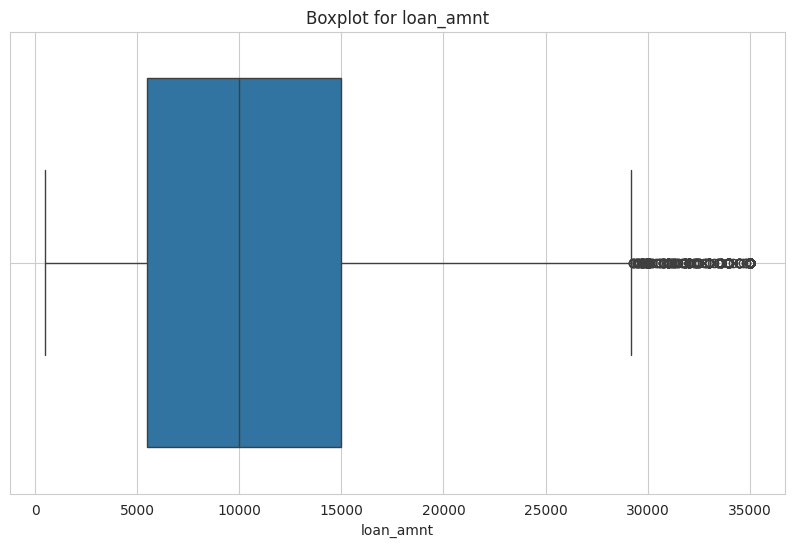


Statistical Details:
count       3.971700e+04
mean        1.121944e+04
std         7.456671e+03
min         5.000000e+02
25%         5.500000e+03
50%         1.000000e+04
75%         1.500000e+04
max         3.500000e+04
mean        1.121944e+04
std_dev     7.456671e+03
variance    5.560194e+07
dtype: float64


In [36]:
analyze_outliers(loan, 'loan_amnt')

### Observation
-   Most of the loan amount value is between 5000 to 15000 and Median is somewhere between 10000
-   There are some loan amount which is greated then 30000 which seems to be an outlier
-   Upper Fence is somwhere around 30k and outliers are between 30 to 35 k
-   as calculated below the percentage of outlier is very less which will not impact the analysis so keep as it is for now 

checking the percentage of outlier 

In [37]:
(loan[loan.loan_amnt>29000].shape[0]/len(loan.loan_amnt))*100

3.132160032228013

### Intrest rate

In [38]:
analyze_outliers(loan, 'int_rate')


Statistical Details:
count       39717.000000
mean           12.021177
std             3.724825
min             5.420000
25%             9.250000
50%            11.860000
75%            14.590000
max            24.590000
mean           12.021177
std_dev         3.724825
variance       13.874325
dtype: float64


In [39]:
(loan[loan.int_rate>22.5].shape[0]/len(loan.int_rate))*100

0.1963894553969333

### Observation
- It is observed that most of the intrest rate which is applied is between 8 to 14 % and around 0.16 % is the outlier whihc is quit less and the outlier is under 25 % which is close to the upper fence limit so it will not impact the analysis so keeping it 

### Annual Income

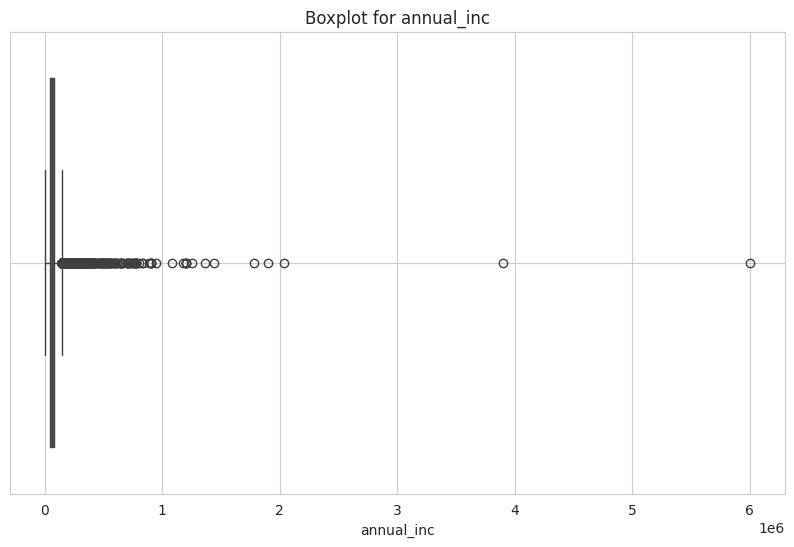


Statistical Details:
count       3.971700e+04
mean        6.896893e+04
std         6.379377e+04
min         4.000000e+03
25%         4.040400e+04
50%         5.900000e+04
75%         8.230000e+04
max         6.000000e+06
mean        6.896893e+04
std_dev     6.379377e+04
variance    4.069645e+09
dtype: float64


In [40]:
analyze_outliers(loan, 'annual_inc')

## Observations:

1. From the above graph, you can see there are few points which are extreme right and far away from the IQR range.
2. To have meaningful insights, we will go ahead and drop the data points which are greater than 95 percentile as these points are considerd outliers.
3. Lets remove the outliers are then plot the box again

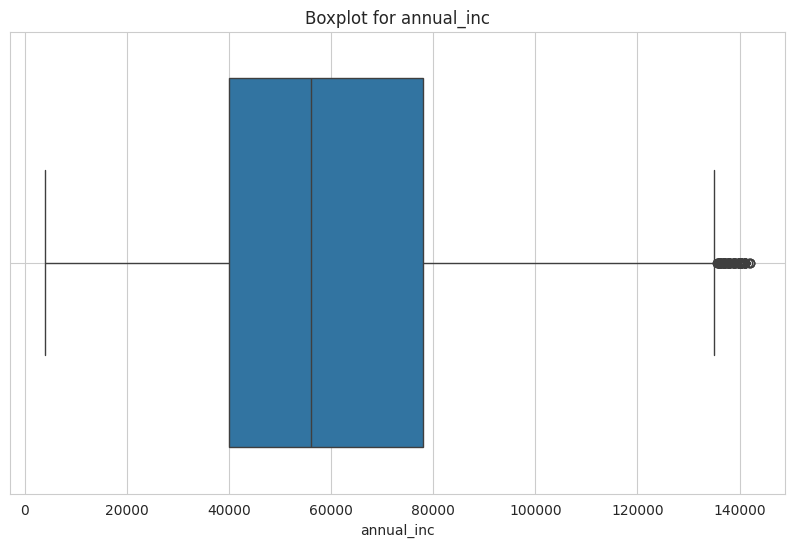


Statistical Details:
count       3.773000e+04
mean        6.104398e+04
std         2.779521e+04
min         4.000000e+03
25%         4.000000e+04
50%         5.600000e+04
75%         7.800000e+04
max         1.419960e+05
mean        6.104398e+04
std_dev     2.779521e+04
variance    7.725738e+08
dtype: float64


In [41]:
# remove outliers and box plot again
loan = loan[loan['annual_inc'] < loan['annual_inc'].quantile(0.95)]

analyze_outliers(loan, 'annual_inc')

### Installement

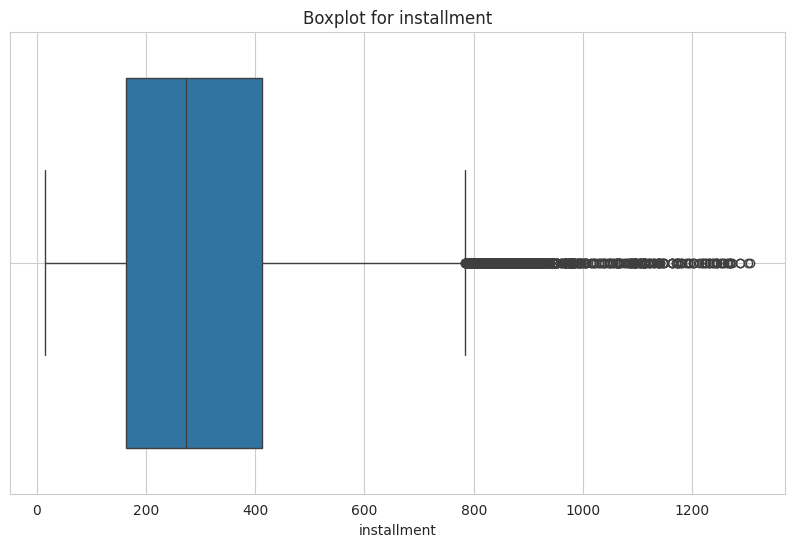


Statistical Details:
count       37730.000000
mean          313.851390
std           199.482913
min            15.690000
25%           163.960000
50%           273.100000
75%           412.045000
max          1305.190000
mean          313.851390
std_dev       199.482913
variance    39793.432427
dtype: float64


In [42]:
analyze_outliers(loan, 'installment')

<h2><center>Univariate analysis</center></h2>

#### Checking the distribution of loan as per status column

- As we know there are two statuses(Fully paid and Chargeoff) first lets check the percentage of data below to each category 

In [43]:
round((loan.loan_status.value_counts()/loan.loan_status.count())*100,2)

loan_status
Fully Paid     82.84
Charged Off    14.37
Current         2.79
Name: count, dtype: float64

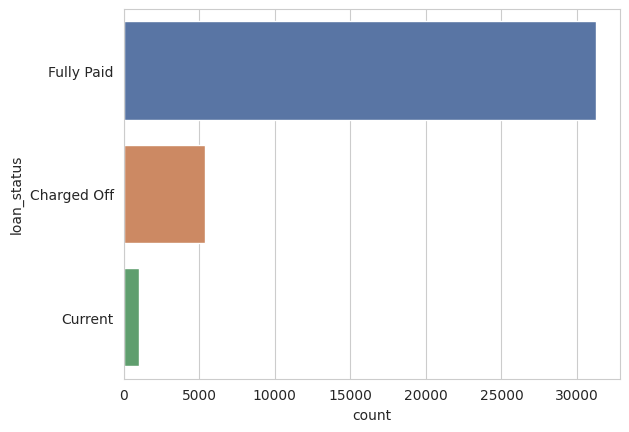

In [44]:
sns.set_style("whitegrid") 
ax=sns.countplot(loan.loan_status,palette='deep')
plt.show()

### Observation
- As we can see the amount of Defaulters with status charged off status is less then those who have paid the loan completely

#### Checking the distribution of loan as per Term Column

In [45]:
#first lets check the percentage of data distribution
round((loan.terms_in_months.value_counts()/loan.terms_in_months.count())*100,2)

terms_in_months
36    73.52
60    26.48
Name: count, dtype: float64

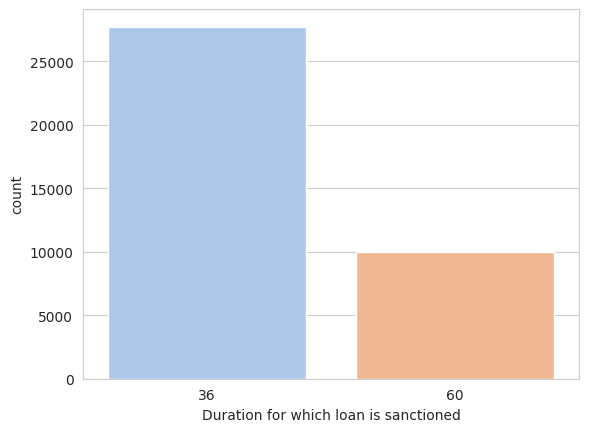

In [46]:
ax=sns.countplot(x=loan.terms_in_months,palette="pastel")
plt.xlabel("Duration for which loan is sanctioned")
plt.show()

### Observation
- As we can see most of the loan which is taken is for 36 month

#### Checking the distribution of loan as per Grade Column

In [47]:
#first lets check the percentage of data distribution in Grade coloumn 
round((loan.grade.value_counts()/loan.grade.count())*100,2)

grade
B    30.29
A    25.69
C    20.49
D    13.37
E     6.92
F     2.50
G     0.73
Name: count, dtype: float64

In [48]:
sns.countplot(x=loan.grade,palette="dark")
plt.xlabel("Grades")
plt.title("Grade Distribuation")
plt.show()

### Observations:
- Most borrowers fall under A and B grades then other grades

#### Checking the distribution of loan as per Sub Grade Column

In [49]:
plt.figure(figsize=(20,4))
sns.countplot(x=loan.sub_grade, order=loan.sub_grade.value_counts().index)
plt.title('Sub Grade Distribution')
plt.xlabel('Sub Grade')
plt.show()


#### Checking the distribution of loan as per work Experience

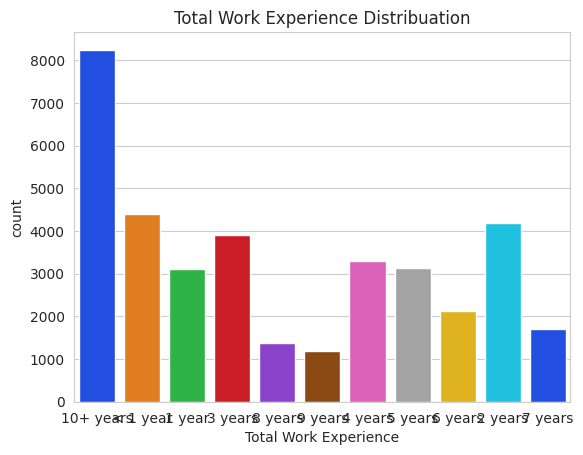

In [50]:
sns.countplot(x=loan.emp_length,palette="bright")
plt.xlabel("Total Work Experience")
plt.title("Total Work Experience Distribuation")
plt.show()

### Obeservation
-  Majority of borrowsers have working experience more than 10 years.

#### Checking the distribution of loan as per home ownership

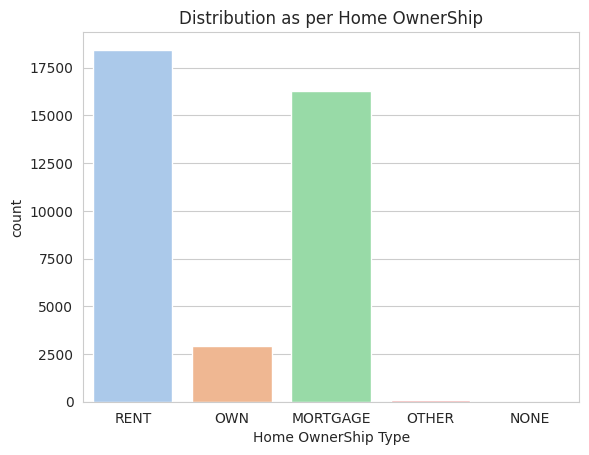

In [51]:
sns.countplot(x=loan.home_ownership,palette="pastel")
plt.xlabel("Home OwnerShip Type")
plt.title("Distribution as per Home OwnerShip")
plt.show()

### Obeservation
-  Majority of borrowsers stay in rented or mortgage house

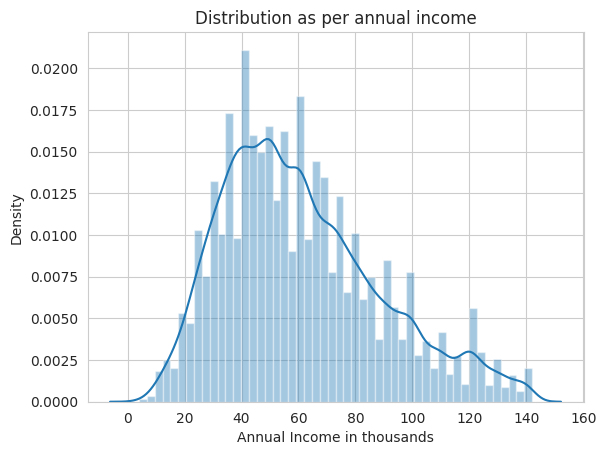

In [52]:
sns.distplot(x=loan.annual_inc/1000,bins=50)
plt.xlabel("Annual Income in thousands")
plt.title("Distribution as per annual income")
plt.show()

### Observation
- We can see that most of the borrower are of lower income Group 

#### Checking the distribution of  Verification status

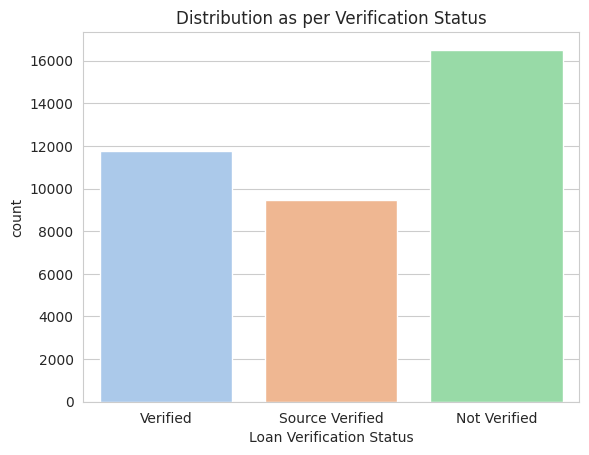

In [53]:
sns.countplot(x=loan.verification_status,palette="pastel")
plt.xlabel("Loan Verification Status")
plt.title("Distribution as per Verification Status")
plt.show()

### Observation
- Most of the loan which are sanctioned are Not Verified

#### Checking the distribution of purpose of the loan

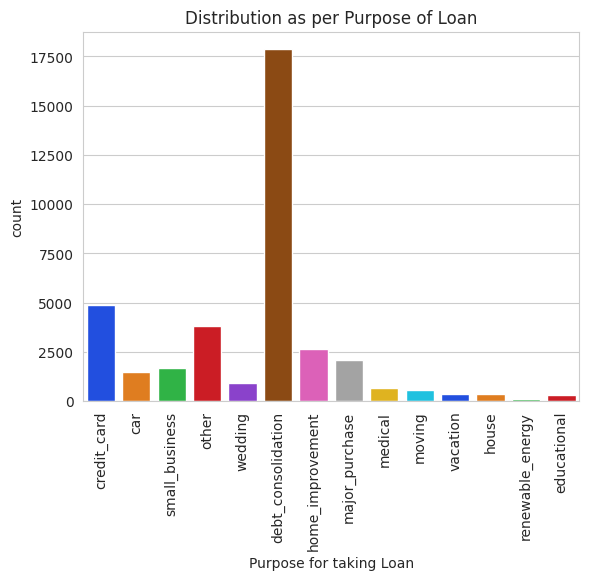

In [54]:
sns.countplot(x=loan.purpose,palette="bright",)
plt.xlabel("Purpose for taking Loan")
plt.xticks(rotation=90)
plt.title("Distribution as per Purpose of Loan")
plt.show()

### Observation
- Most of the loan is taken for paying debt

#### Checking the distribution of Year when loan was Granted 

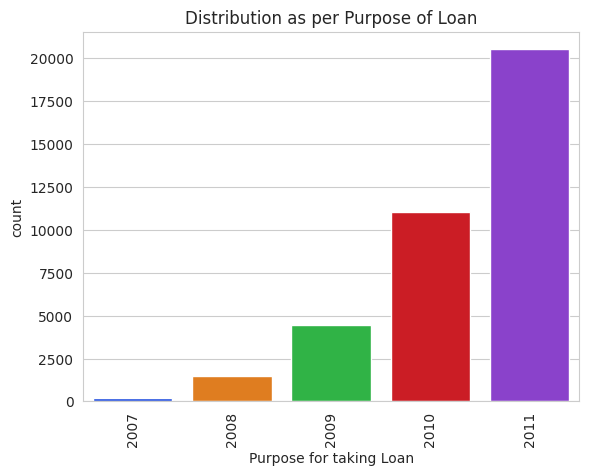

In [55]:
sns.countplot(x=loan.year,palette="bright",)
plt.xlabel("Purpose for taking Loan")
plt.xticks(rotation=90)
plt.title("Distribution as per Purpose of Loan")
plt.show()

### Observation
- Most of the loan is taken in last 3 year
- That also can be because number of people is applying for loan has increased

<h2><center>Bivariate Analysis and Segmented Univariate </center></h2>

In [56]:
loan.columns

Index(['index', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'terms_in_months', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies', 'year', 'month'],
      dtype='object')

## Based on loan status and Interest rate

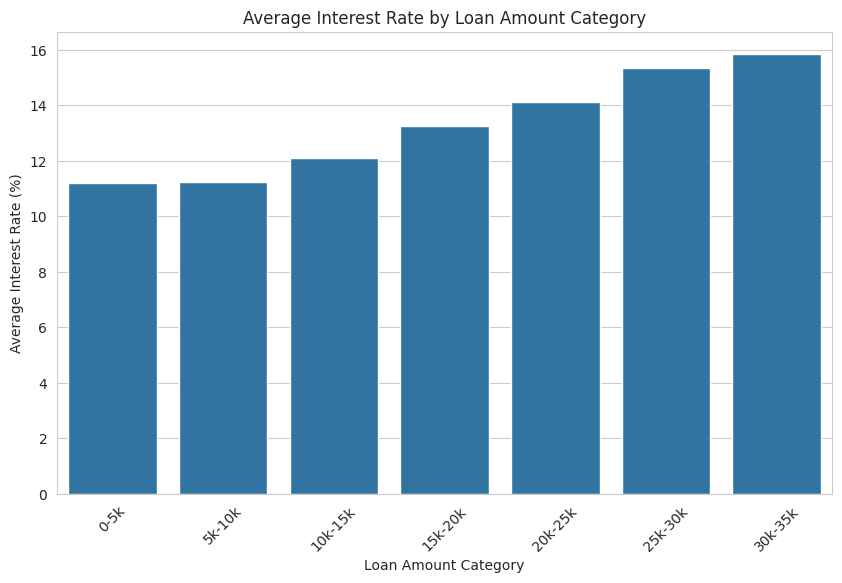

In [57]:
# Binning the loan amounts into categories
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k', '30k-35k']
loan['loan_amount_binned'] = pd.cut(loan['loan_amnt'], bins=bins, labels=labels, include_lowest=True)

# Grouping by binned column and calculating mean interest rate
grouped = loan.groupby('loan_amount_binned')['int_rate'].mean().reset_index()

# Show the plots
plt.figure(figsize=(10, 6))
sns.barplot(x='loan_amount_binned', y='int_rate', data=grouped)
plt.title('Average Interest Rate by Loan Amount Category')
plt.xlabel('Loan Amount Category')
plt.ylabel('Average Interest Rate (%)')
plt.xticks(rotation=45)
plt.show()

## Observations:
1. The loan amout is categorized into bins of 5000 intervals.
2. We can see that the interest rate is directly proportional to the loan amount

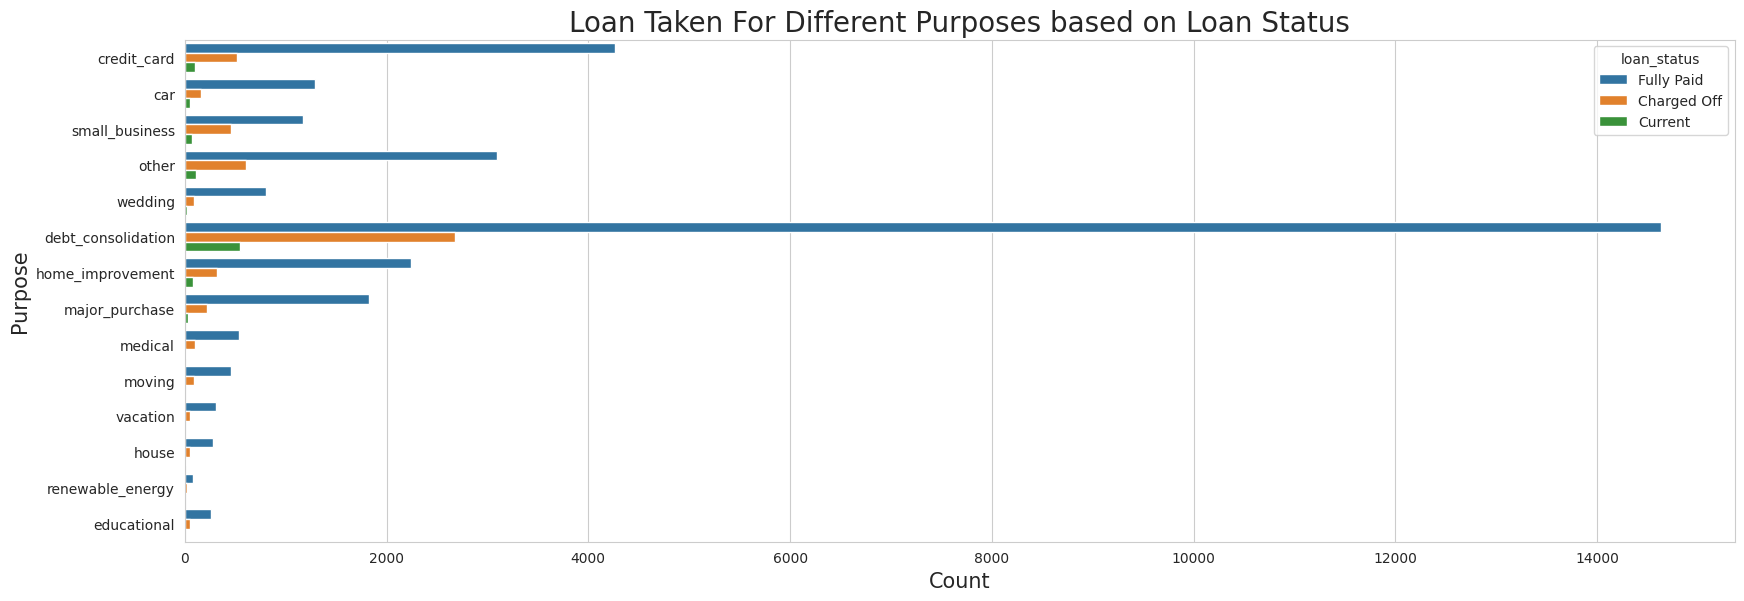

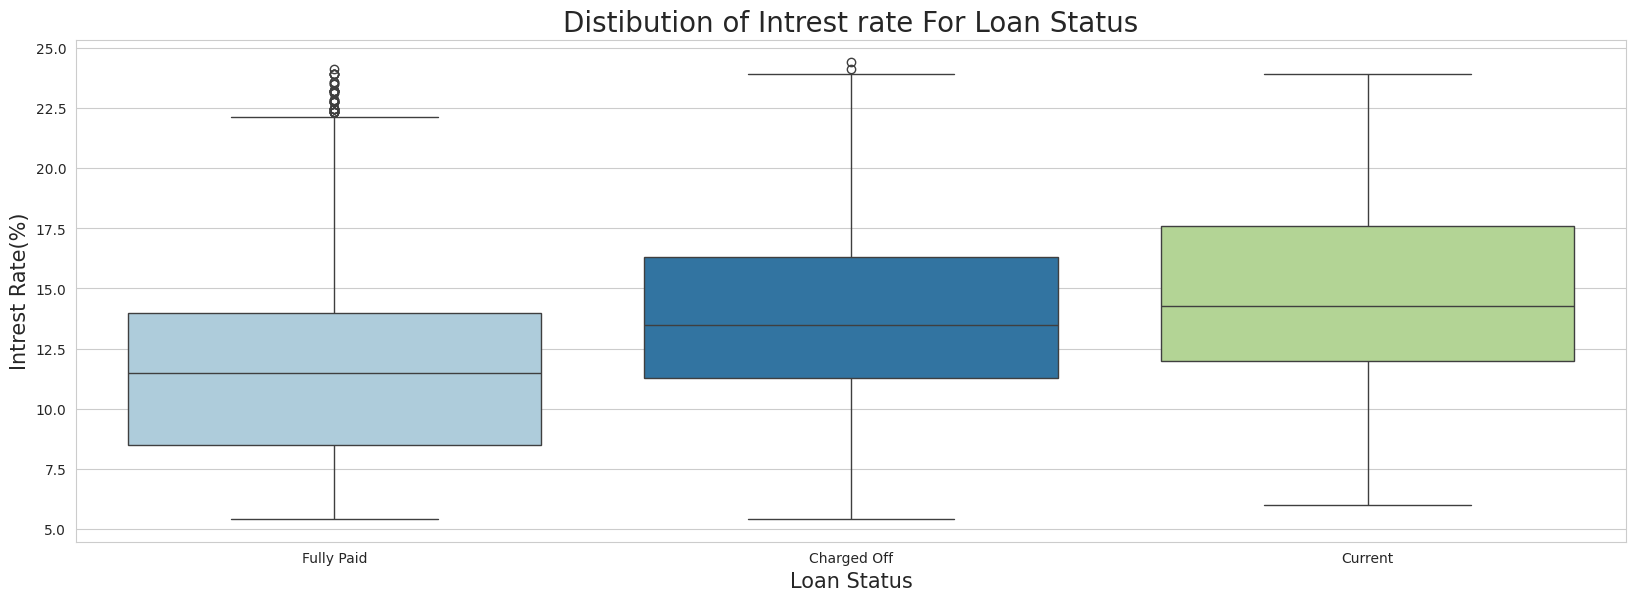

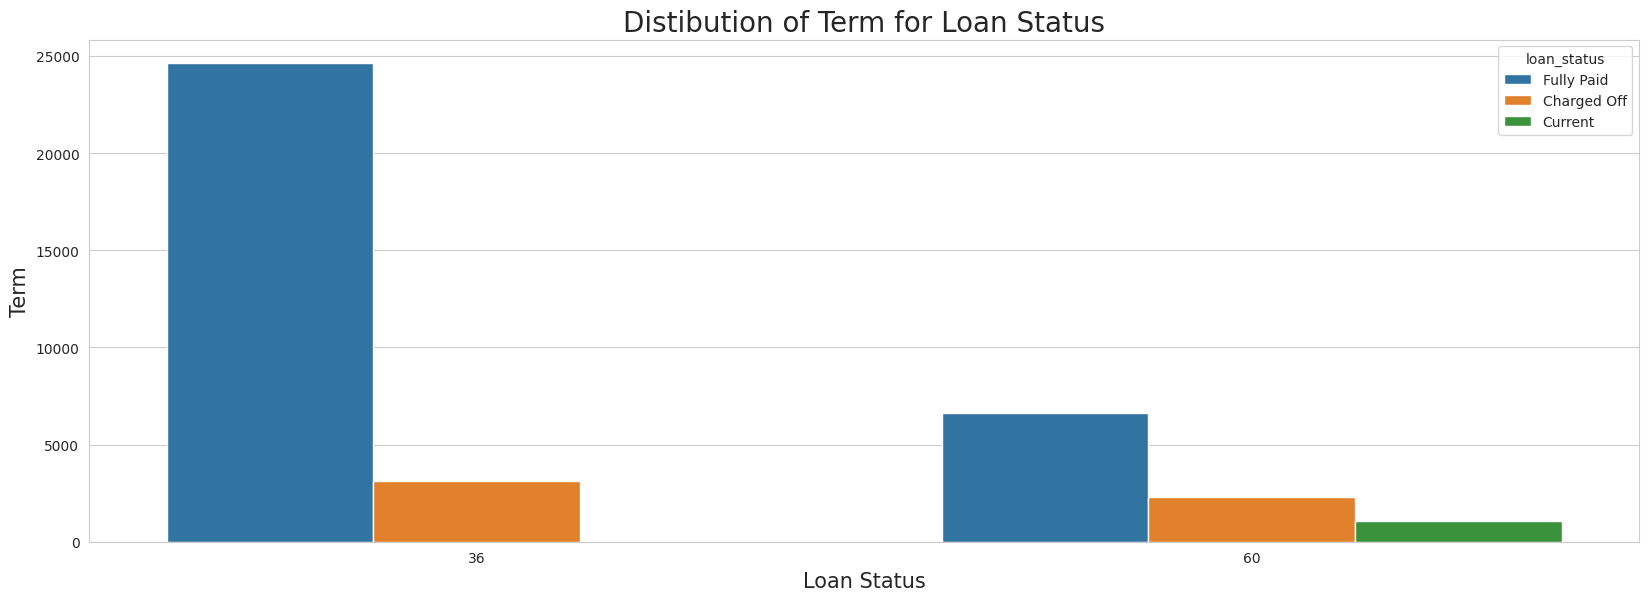

In [58]:
# Distribution of purpose based on loan_status
plt.figure(figsize=(20,30))
plt.subplot(411)
sns.countplot(data=loan,y='purpose',hue='loan_status')
plt.xlabel('Count',fontsize=15)
plt.ylabel('Purpose',fontsize=15)
plt.title('Loan Taken For Different Purposes based on Loan Status',fontsize=20)
# Distribution of Loan amount based on loan_status
plt.figure(figsize=(20,30))
plt.subplot(412)
sns.boxplot(data=loan,y='loan_amnt',x='loan_status',palette="bright")
plt.xlabel('Loan Status',fontsize=15)
plt.ylabel('Loan Amount',fontsize=15)
plt.title('Distibution of Loan Amount For Loan Status',fontsize=20)
# Distribution of Intrest rate based on loan_status
plt.figure(figsize=(20,30))
plt.subplot(413)
sns.boxplot(data=loan,y='int_rate',x='loan_status',palette="Paired")
plt.xlabel('Loan Status',fontsize=15)
plt.ylabel('Intrest Rate(%)',fontsize=15)
plt.title('Distibution of Intrest rate For Loan Status',fontsize=20)
# Distribution of Loan Term based on loan_status
plt.figure(figsize=(20,30))
plt.subplot(414)
sns.countplot(data=loan,x='terms_in_months',hue='loan_status')
plt.xlabel('Loan Status',fontsize=15)
plt.ylabel('Term',fontsize=15)
plt.title('Distibution of Term for Loan Status',fontsize=20)

plt.show()


### Observation
- Most of the loan which is defaulted is taken for following purpose(DebtConsolidation,CreditCard)
- The mean and 25% percentile are almost same for both Status but we see larger 75% percentile in the defaulted loan which indicate large amount of loan has higher chance of defaulting.
-  For Intrest Rate The mean and 25 percentile of data is quite high in Defaulter loan which indicate large Intrest on loan has higher chance of defaulting
-  As indicated in Plot ratio of defaulter compare to fully paid is high in 60 month term

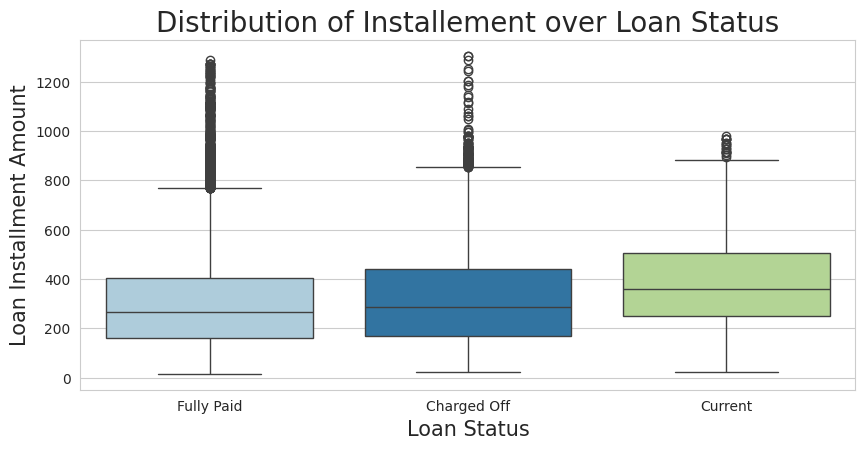

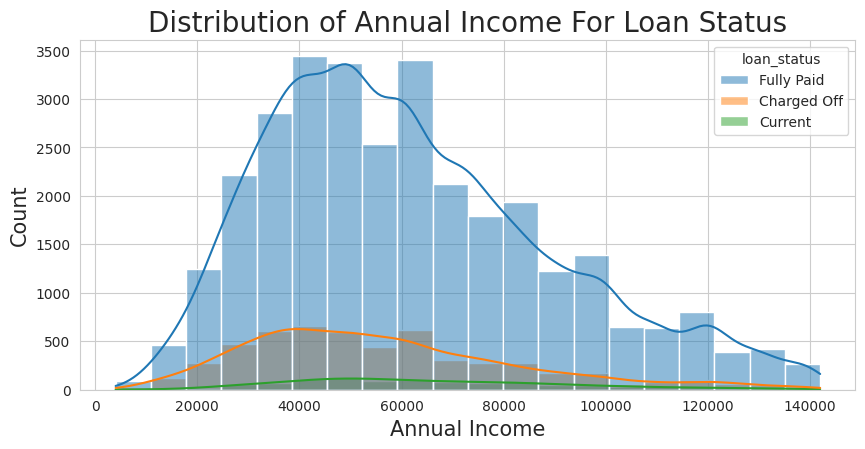

In [59]:
# Distribution of Installment Amount based on loan_status
plt.figure(figsize=(10,10))
plt.subplot(211)
sns.boxplot(data=loan,y=loan.installment,x='loan_status',palette="Paired")
plt.xlabel('Loan Status',fontsize=15)
plt.ylabel('Loan Installment Amount',fontsize=15)
plt.title('Distribution of Installement over Loan Status',fontsize=20)

# Distribution of Annual Income vs loan_status
plt.figure(figsize=(10,10))
plt.subplot(212)
sns.histplot(data=loan,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Distribution of Annual Income For Loan Status',fontsize=20)

plt.show()

### Observation
-  Amount of defaulters are more when the installment amount is more as compare to fullypaid
-  Probablity of deafulting the loan is high when annual income is less then a 50k

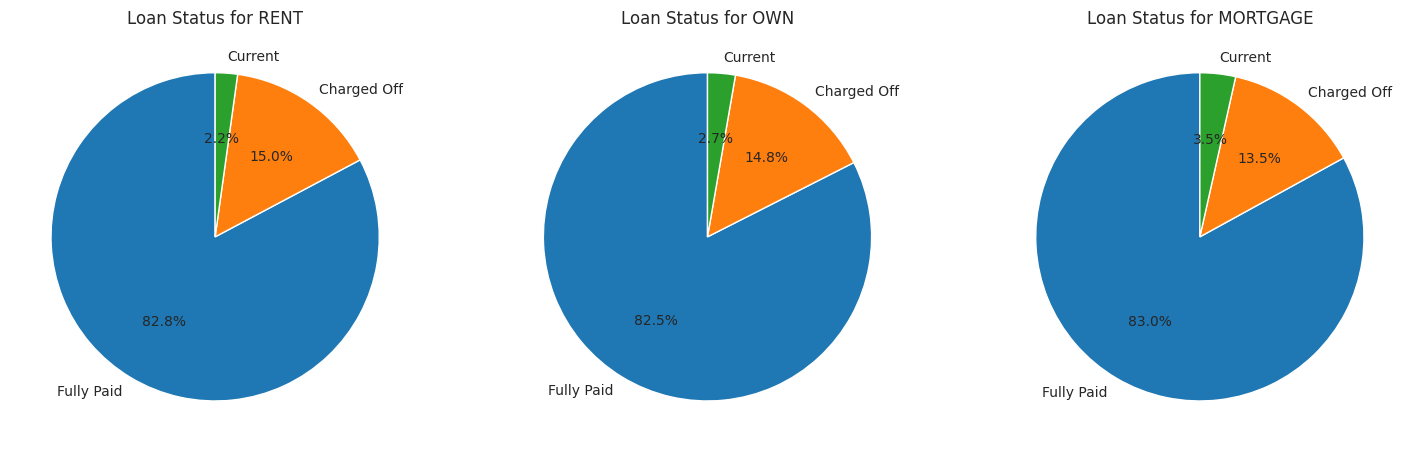

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust layout and size as needed
home_ownerships = loan['home_ownership'].unique()
for ax, home_ownership in zip(axes, home_ownerships):
    subset = loan[loan['home_ownership'] == home_ownership]
    counts = subset['loan_status'].value_counts()
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Loan Status for {home_ownership}')
plt.show()

### Observations
- The majority of loans across all home ownerships are fully paid. Only a small portion of loans is still ongoing.
- There is no significant difference in the percentages of fully paid, charged-off and current across all the status.

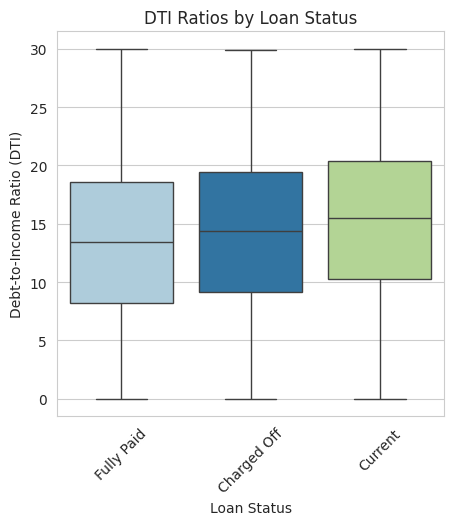

In [61]:
# 'DTI Ratios by Loan Status
plt.figure(figsize=(5, 5))
sns.boxplot(x='loan_status', y='dti', data=loan,palette="Paired")
plt.title('DTI Ratios by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio (DTI)')
plt.xticks(rotation=45)
plt.show()

In [62]:
# Encoding loan status as numeric
loan['Loan_status_numeric'] = loan['loan_status'].map({'Fully Paid': 0, 'Current': 0, 'Charged Off': 1, 'Default': 1})

# Calculating the correlation
correlation = loan[['dti', 'Loan_status_numeric']].corr().iloc[0, 1]
print(f"Correlation coefficient between DTI and Default Rate: {correlation:.3f}")

Correlation coefficient between DTI and Default Rate: 0.038


## Observations
1. The median is almost same for all the three types with slightly upward trend for current type.
2. The IQR is also same for the three types with `charged off` having slightly higher variance.
3. The corelation coeffienct explain the weaker relation between DTI to loan statusus

## Loan Amount

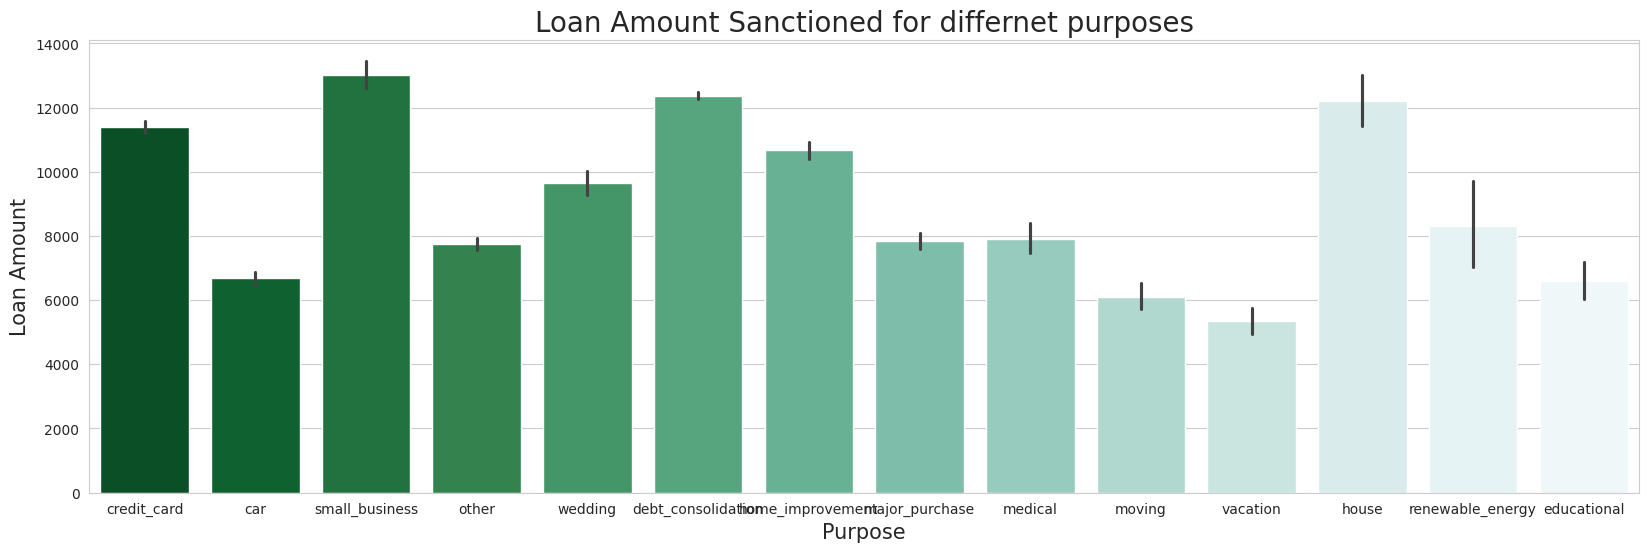

In [63]:
# Distribution of purpose based on Loan Amount
plt.figure(figsize=(20,20))

plt.subplot(311)
sns.barplot(data=loan,x='purpose',y=loan.loan_amnt,palette="BuGn_r")
plt.ylabel('Loan Amount',fontsize=15)
plt.xlabel('Purpose',fontsize=15)
plt.title('Loan Amount Sanctioned for differnet purposes',fontsize=20)

# Distribution of Loan amount based on verification_status
plt.figure(figsize=(20,20))
plt.subplot(312)
sns.boxplot(data=loan,y='loan_amnt',x='verification_status',palette="bright")
plt.xlabel('Verification Status',fontsize=15)
plt.ylabel('Loan Amount',fontsize=15)
plt.title('Distibution of Loan Amount based on verification status',fontsize=20)

# Distribution of Loan Term based on Loan Amount
plt.figure(figsize=(20,20))
plt.subplot(313)
sns.boxplot(data=loan,y='loan_amnt',hue='terms_in_months')
plt.ylabel('Loan Amount',fontsize=15)
plt.xlabel('Term',fontsize=15)
plt.title('Distibution Loan Amount for Different Term',fontsize=20)
plt.show()

### Observation
- Most of the Loan is sanctioned for Small Businees followed by debt Consolidation and houses.
- There are Lot of high amount loans which is not verified or either source verified 
- Higher amount loans have high tenure i.e, 60 months.


Text(0.5, 1.0, 'Employeement Length vs Loan Amount')

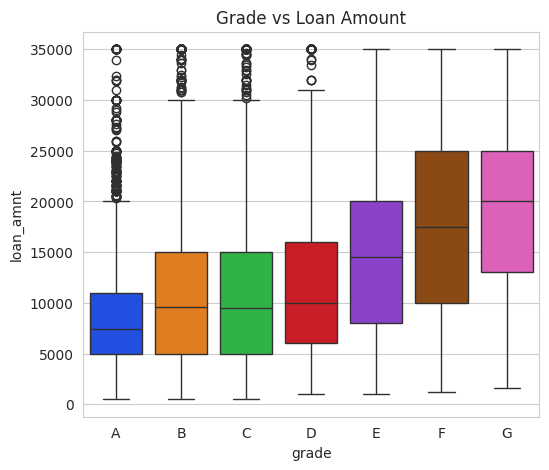

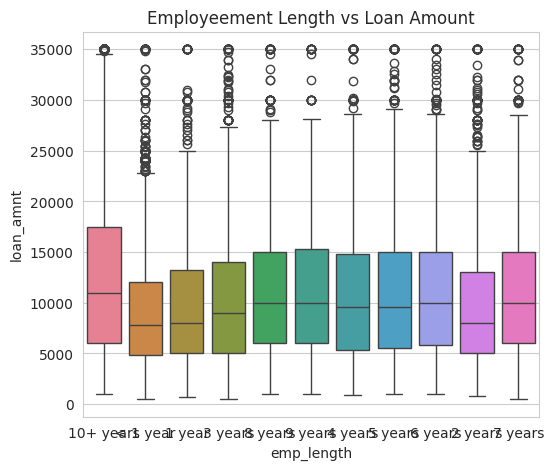

In [64]:
# comparing Grade vs Loan Amount

plt.figure(figsize=(20,5))
plt.subplot(131)
plt.title('Grade vs Loan Amount')

#Finding grades with sorted alphabetical order
grade_ord = loan.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan.loan_amnt, order = grade_ord, data=loan,palette="bright")

# comparing Home OwnerShip vs Loan Amount
plt.figure(figsize=(20,5))
plt.subplot(132)
sns.boxplot(x='home_ownership', y=loan.loan_amnt, data=loan,palette="grey")
plt.title('home_ownership vs Loan Amount')

# comparing employeement length vs Loan Amount
plt.figure(figsize=(20,5))
plt.subplot(132)
sns.boxplot(x='emp_length', y=loan.loan_amnt, data=loan,palette="husl")
plt.title('Employeement Length vs Loan Amount')


### Observation
- Grade 'G' and '' have taken max loan amount. As Grades are decreasing the loan amount is increasing.
- more borrowers have home under MORTAGE
- employee with more than 10 years of work experience take more amount of loan k


## Intrest rate

Text(0.5, 1.0, 'home_ownership vs Interest Rate')

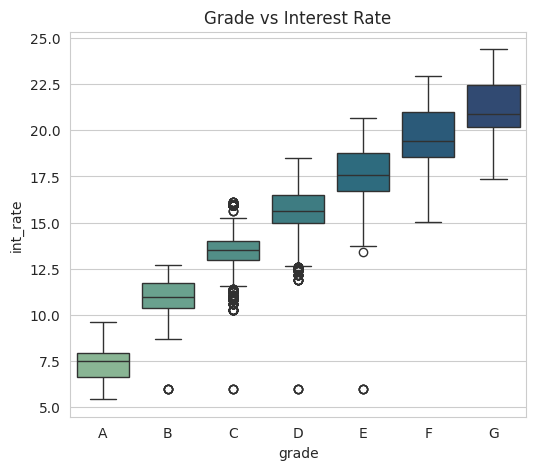

In [65]:
# correlation between Term and Intrest Rate 
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.boxplot(x='terms_in_months', y=loan.int_rate, data=loan,palette="rocket")
plt.title('Term vs Interest Rate')

# correlation between Grade and Intrest Rate 
plt.figure(figsize=(20,5))
plt.subplot(132)
plt.title('Grade vs Interest Rate')
grade_ord = loan.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan.int_rate, order = grade_ord, data=loan,palette="crest")

# correlation between Home ownerShip and Intrest Rate 
plt.figure(figsize=(20,5))
plt.subplot(133)
sns.boxplot(x='home_ownership', y=loan.int_rate, data=loan,palette="flare")
plt.title('home_ownership vs Interest Rate')

### Observation
- Longer the Term Higer the Intrest Rate
- Lower the Grade Higer tHe Intrest Rate
- Barrowers with Own and Mortgage got loans with less interest rates .

Text(0.5, 1.0, 'emp_length vs Interest Rate')

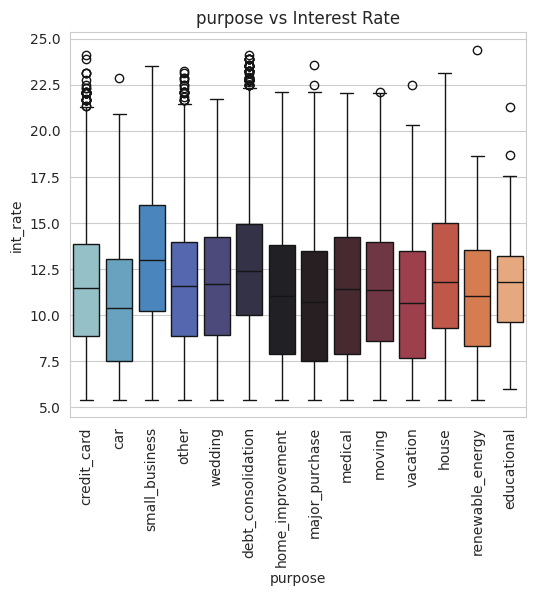

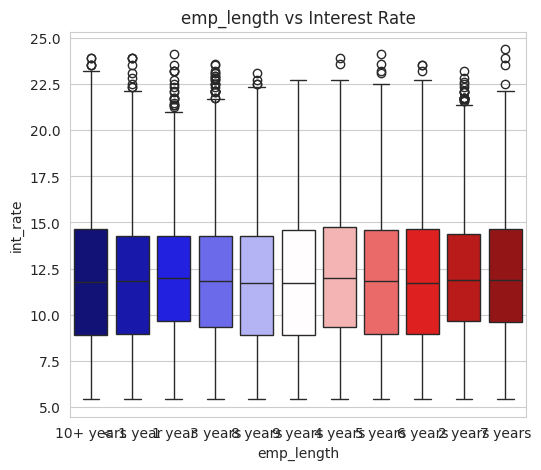

In [66]:
# correlation between verification status and Intrest Rate 
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.title('verification_status vs Interest Rate')
verification_status_ord = loan.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan.int_rate, order = verification_status_ord, data=loan,palette="vlag")

# correlation between purpose and Intrest Rate 
plt.figure(figsize=(20,5))
plt.subplot(132)
sns.boxplot(x='purpose', y=loan.int_rate, data=loan,palette="icefire")
plt.xticks(rotation=90)
plt.title('purpose vs Interest Rate')

# correlation between employee length and Intrest Rate 
plt.figure(figsize=(20,5))
plt.subplot(133)
sns.boxplot(x='emp_length', y=loan.int_rate, data=loan,palette="seismic")
plt.title('emp_length vs Interest Rate')

### Observation
- Verified Loans have higer intrest Rate and comapre to Source verified and not verified
- Small Business, Debt Consolidation and House loans are given with more interest rates comparativesly others.
- Employee length doesnt have any significant impact on the intrest rate 

## DTI

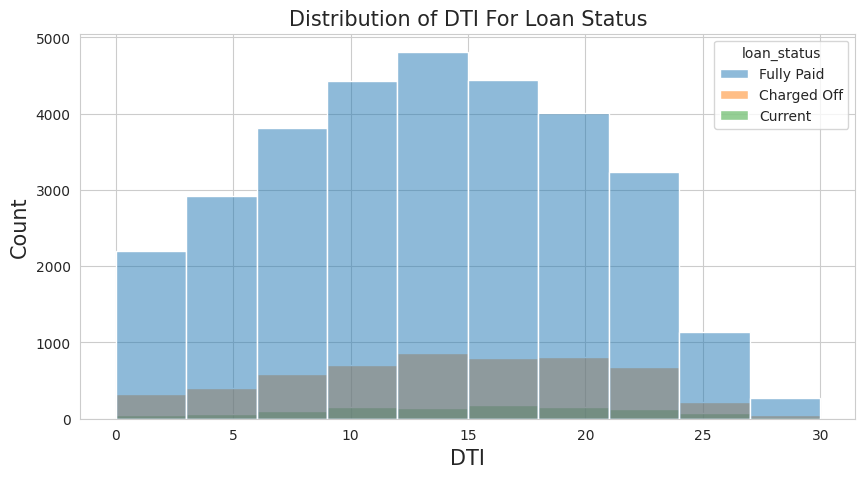

In [67]:
# Distribution of DTI based on Grade
plt.figure(figsize=(10,5))
sns.histplot(data=loan,x='dti',hue='loan_status',bins=10)
plt.xlabel('DTI',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Distribution of DTI For Loan Status',fontsize=15)
plt.show()

### Observation
- We can see most number of defaulter is there in DTI Range 10-20

In [68]:
loan.columns

Index(['index', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'terms_in_months', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies', 'year', 'month',
       'loan_amount_binned', 'Loan_status_numeric'],
      dtype='object')

In [69]:
print(loan.loan_status.unique(),loan.terms_in_months.unique(),loan.verification_status.unique())

['Fully Paid' 'Charged Off' 'Current'] [36 60] ['Verified' 'Source Verified' 'Not Verified']


## Based on employment details

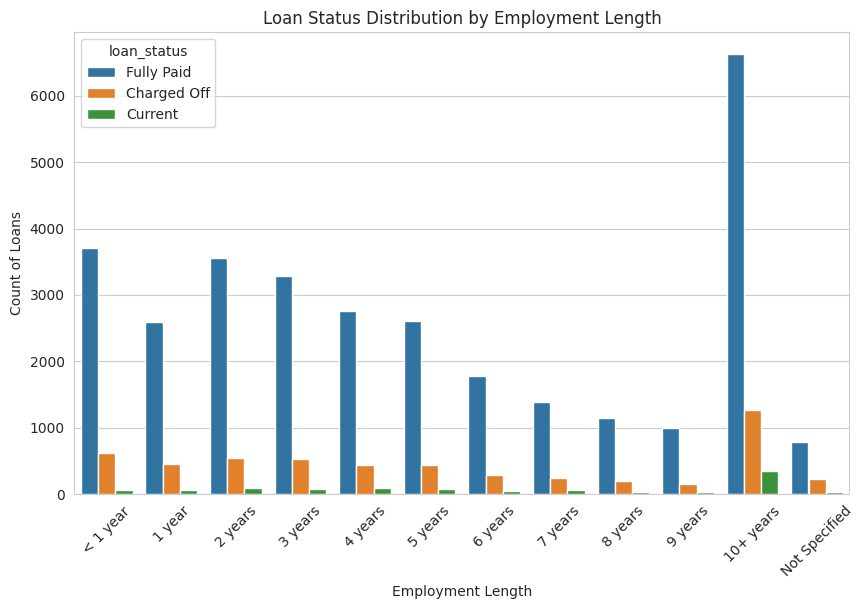

In [70]:
loan['emp_length'] = loan['emp_length'].astype(str)  # Convert all to string
loan['emp_length'] = loan['emp_length'].replace('nan', 'Not Specified')  # Replace NaN values if any

# Custom sort order, assuming 'emp_length' includes categories like '10+ years', '< 1 year', etc.
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years', 'Not Specified']

# Show the plots
plt.figure(figsize=(10, 6))
sns.countplot(x='emp_length', hue='loan_status', data=loan, order=order)
plt.title('Loan Status Distribution by Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Count of Loans')
plt.xticks(rotation=45)
plt.show()

## Observations:
1. Fully paid status is high across all the employment types.
2. The charged off staus doesnt significantly corelate with the employment length
3. There is relatively high current status in 10+ years of employment length

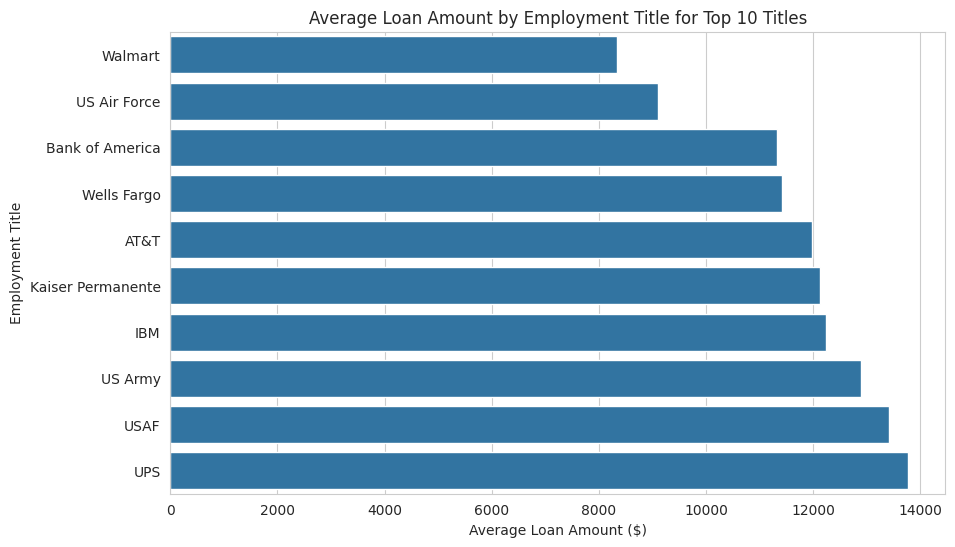

In [71]:
top_titles = loan['emp_title'].value_counts().nlargest(10).index  # top 10 titles
filtered_data = loan[loan['emp_title'].isin(top_titles)]
avg_loan_amounts = filtered_data.groupby('emp_title')['loan_amnt'].mean().sort_values()

# Show the plots
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_loan_amounts.values, y=avg_loan_amounts.index)
plt.xlabel('Average Loan Amount ($)')
plt.ylabel('Employment Title')
plt.title('Average Loan Amount by Employment Title for Top 10 Titles')
plt.show()

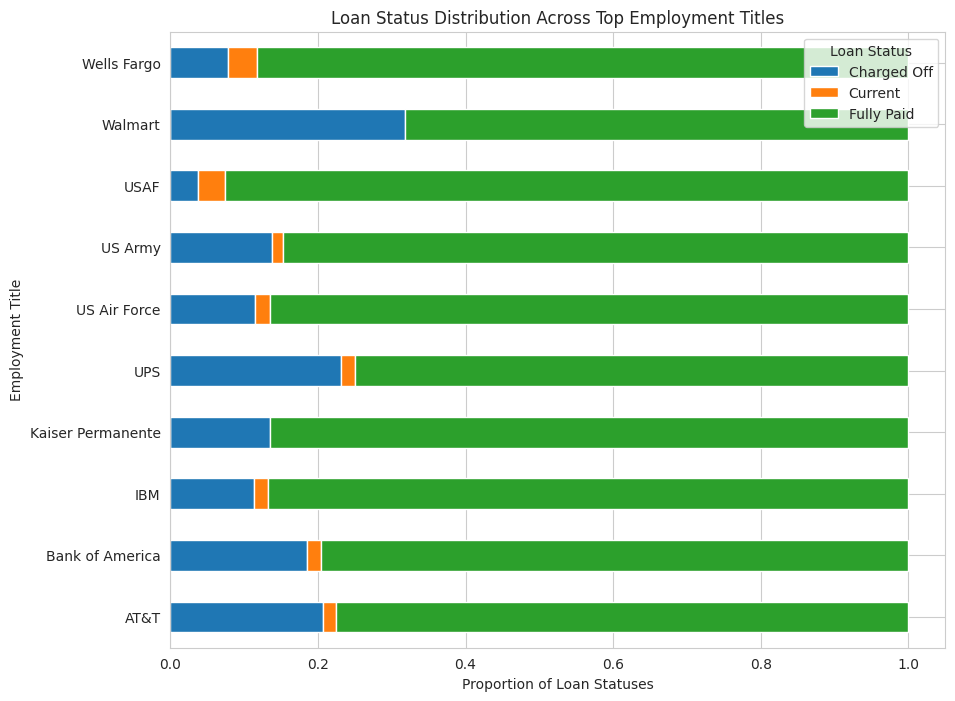

In [72]:
# Creating a cross-tabulation of loan status by top employment titles
status_distribution = pd.crosstab(filtered_data['emp_title'], filtered_data['loan_status'])

# Normalizing the data by rows to get proportions
status_distribution = status_distribution.div(status_distribution.sum(axis=1), axis=0)

# Show the plots
status_distribution.plot(kind='barh', stacked=True, figsize=(10, 8))
plt.title('Loan Status Distribution Across Top Employment Titles')
plt.xlabel('Proportion of Loan Statuses')
plt.ylabel('Employment Title')
plt.legend(title='Loan Status')
plt.show()

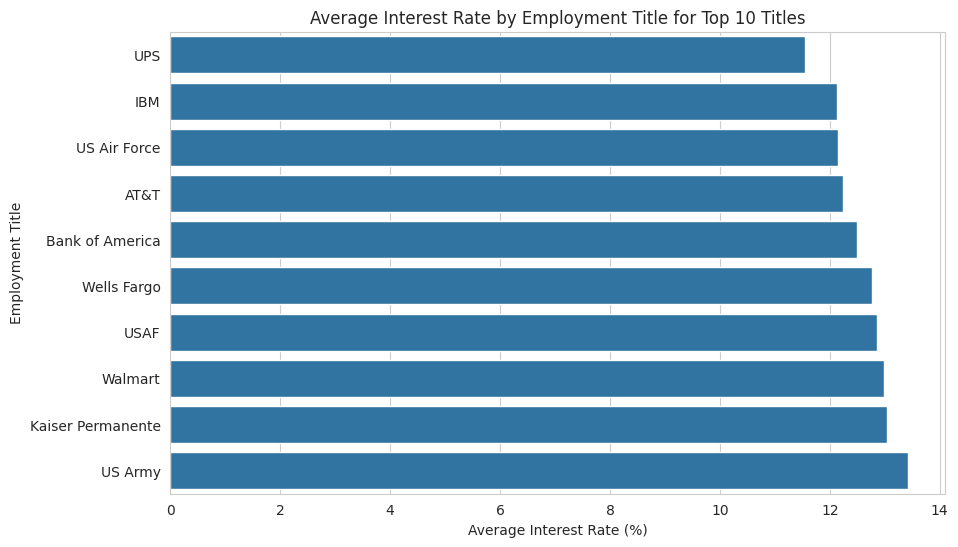

In [73]:
avg_interest_rates = filtered_data.groupby('emp_title')['int_rate'].mean().sort_values()

# Show the plots
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_interest_rates.values, y=avg_interest_rates.index)
plt.xlabel('Average Interest Rate (%)')
plt.ylabel('Employment Title')
plt.title('Average Interest Rate by Employment Title for Top 10 Titles')
plt.show()

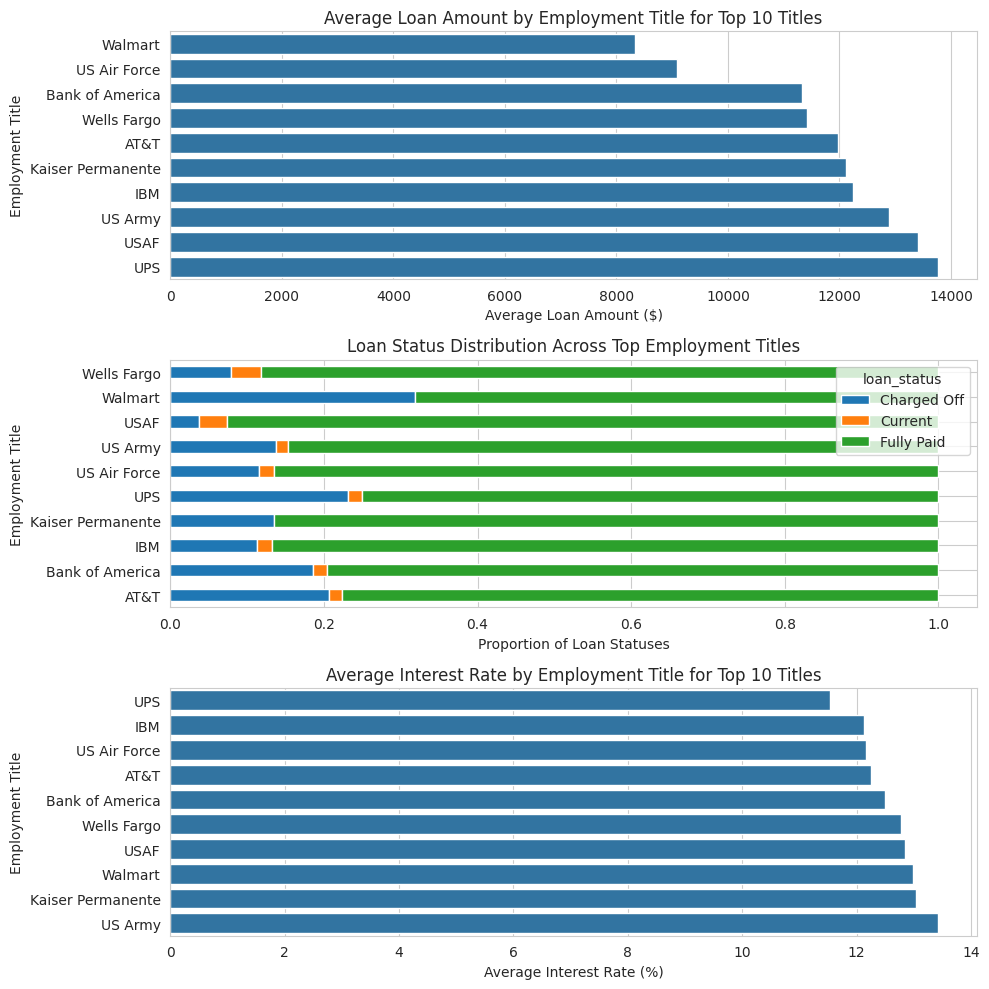

In [74]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

# First subplot: Average Loan Amounts
avg_loan_amounts = filtered_data.groupby('emp_title')['loan_amnt'].mean().sort_values()
sns.barplot(x=avg_loan_amounts.values, y=avg_loan_amounts.index, ax=axes[0])
axes[0].set_title('Average Loan Amount by Employment Title for Top 10 Titles')
axes[0].set_xlabel('Average Loan Amount ($)')
axes[0].set_ylabel('Employment Title')

# Second subplot: Loan Status Distribution
status_distribution = pd.crosstab(filtered_data['emp_title'], filtered_data['loan_status'])
status_distribution = status_distribution.div(status_distribution.sum(axis=1), axis=0)
status_distribution.plot(kind='barh', stacked=True, ax=axes[1])
axes[1].set_title('Loan Status Distribution Across Top Employment Titles')
axes[1].set_xlabel('Proportion of Loan Statuses')
axes[1].set_ylabel('Employment Title')

# Third subplot: Average Interest Rates
avg_interest_rates = filtered_data.groupby('emp_title')['int_rate'].mean().sort_values()
sns.barplot(x=avg_interest_rates.values, y=avg_interest_rates.index, ax=axes[2])
axes[2].set_title('Average Interest Rate by Employment Title for Top 10 Titles')
axes[2].set_xlabel('Average Interest Rate (%)')
axes[2].set_ylabel('Employment Title')

# Show the plots
plt.tight_layout()
plt.show()


## Observation:
1. Certain orgs like UPS, USAF appear to higher average loan amounts than other orgs
2. Few orgs like Walmart, UPS, Bank of America and At&t show a noticable amount of loans charged off. This might indicate that private companies tend to charge off their employee loans.
3. The interest rates show significant difference across the orgs altought US Army has higesht interest rate

## Avergae interest rate and loan amount based on geographics

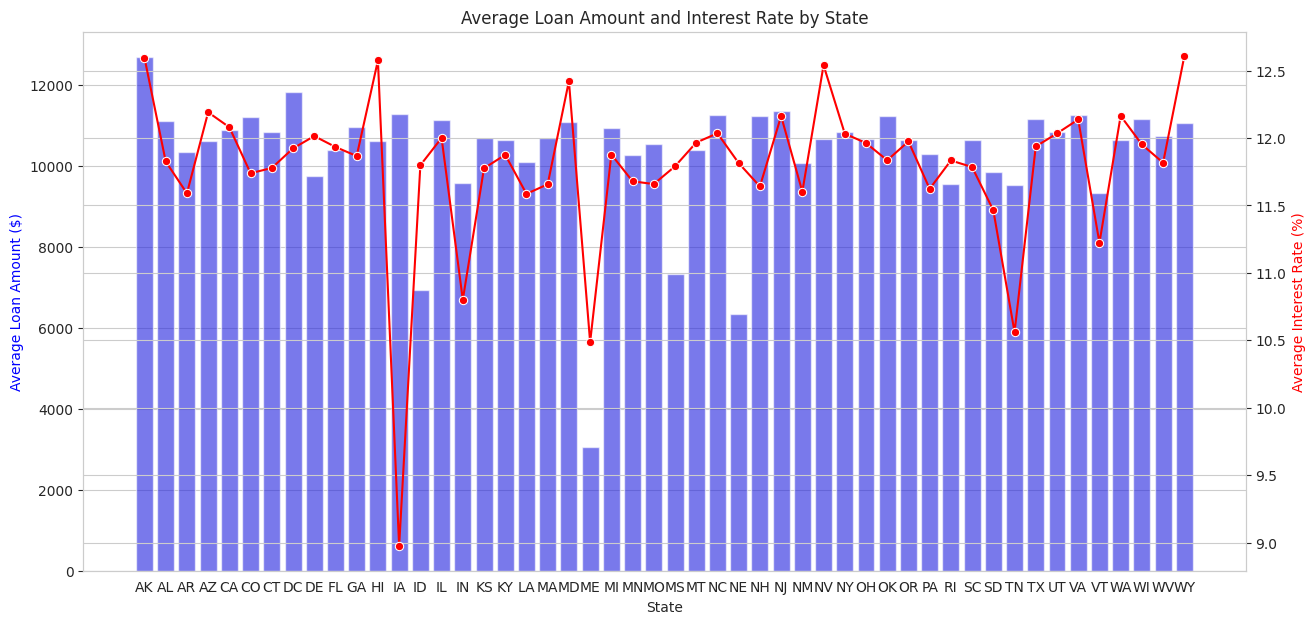

In [75]:
# Group by state and calculate average loan amount and interest rate
state_loan_data = loan.groupby('addr_state').agg({
    'loan_amnt': 'mean',
    'int_rate': 'mean'
}).reset_index()

# Show the plots
fig, ax1 = plt.subplots(figsize=(15, 7))
sns.barplot(x='addr_state', y='loan_amnt', data=state_loan_data, ax=ax1, color='blue', alpha=0.6)
ax1.set_ylabel('Average Loan Amount ($)', color='blue')
ax2 = ax1.twinx()
sns.lineplot(x='addr_state', y='int_rate', data=state_loan_data, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Average Interest Rate (%)', color='red')
ax1.set_xlabel('State')
plt.title('Average Loan Amount and Interest Rate by State')
plt.xticks(rotation=45)
plt.show()

## Observations
1. We can see that average interest rate is very low in `IA` state compared to other states.
2. The highest rate are in `AK`, `HI`, `WY` states

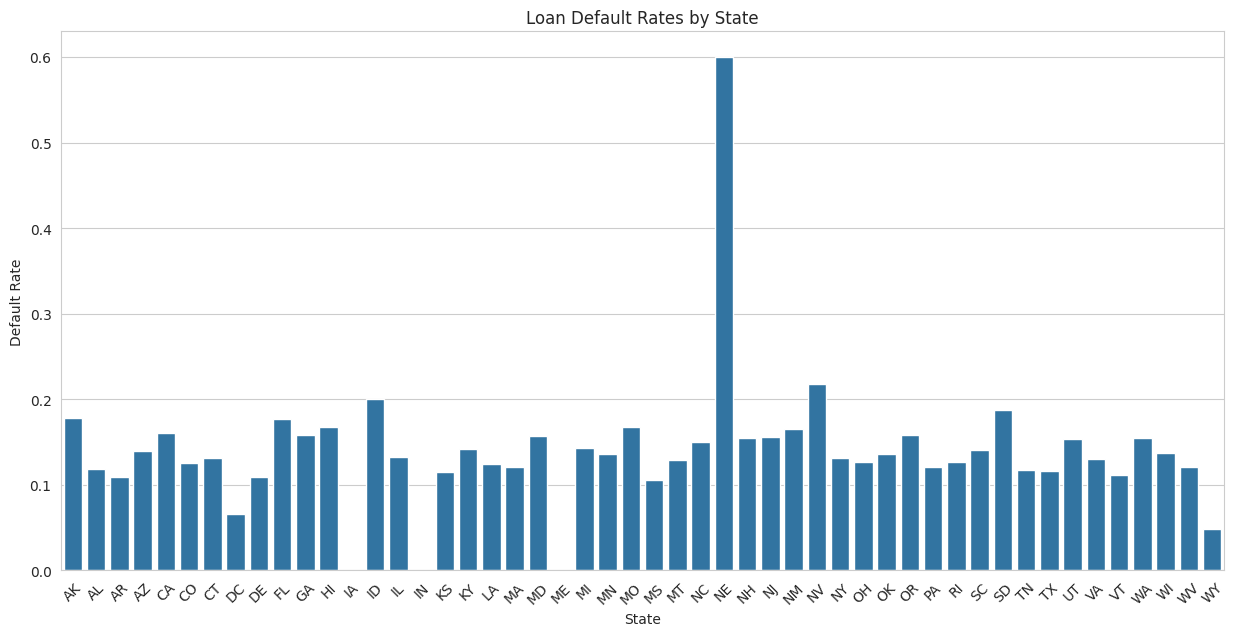

In [76]:
# Define default as Charged Off or Default loan status
loan['is_default'] = loan['loan_status'].apply(lambda x: 1 if x in ['Charged Off', 'Default'] else 0)

# Group by state and calculate default rate
default_rates = loan.groupby('addr_state')['is_default'].mean().reset_index()

# Show the plots
plt.figure(figsize=(15, 7))
sns.barplot(x='addr_state', y='is_default', data=default_rates)
plt.ylabel('Default Rate')
plt.xlabel('State')
plt.title('Loan Default Rates by State')
plt.xticks(rotation=45)
plt.show()

## Observations
1. The default loan rate is highest in `Ne` and lowest in `DC`

<h2><center>Multivariate analysis</center></h2>

## Corelation matrix

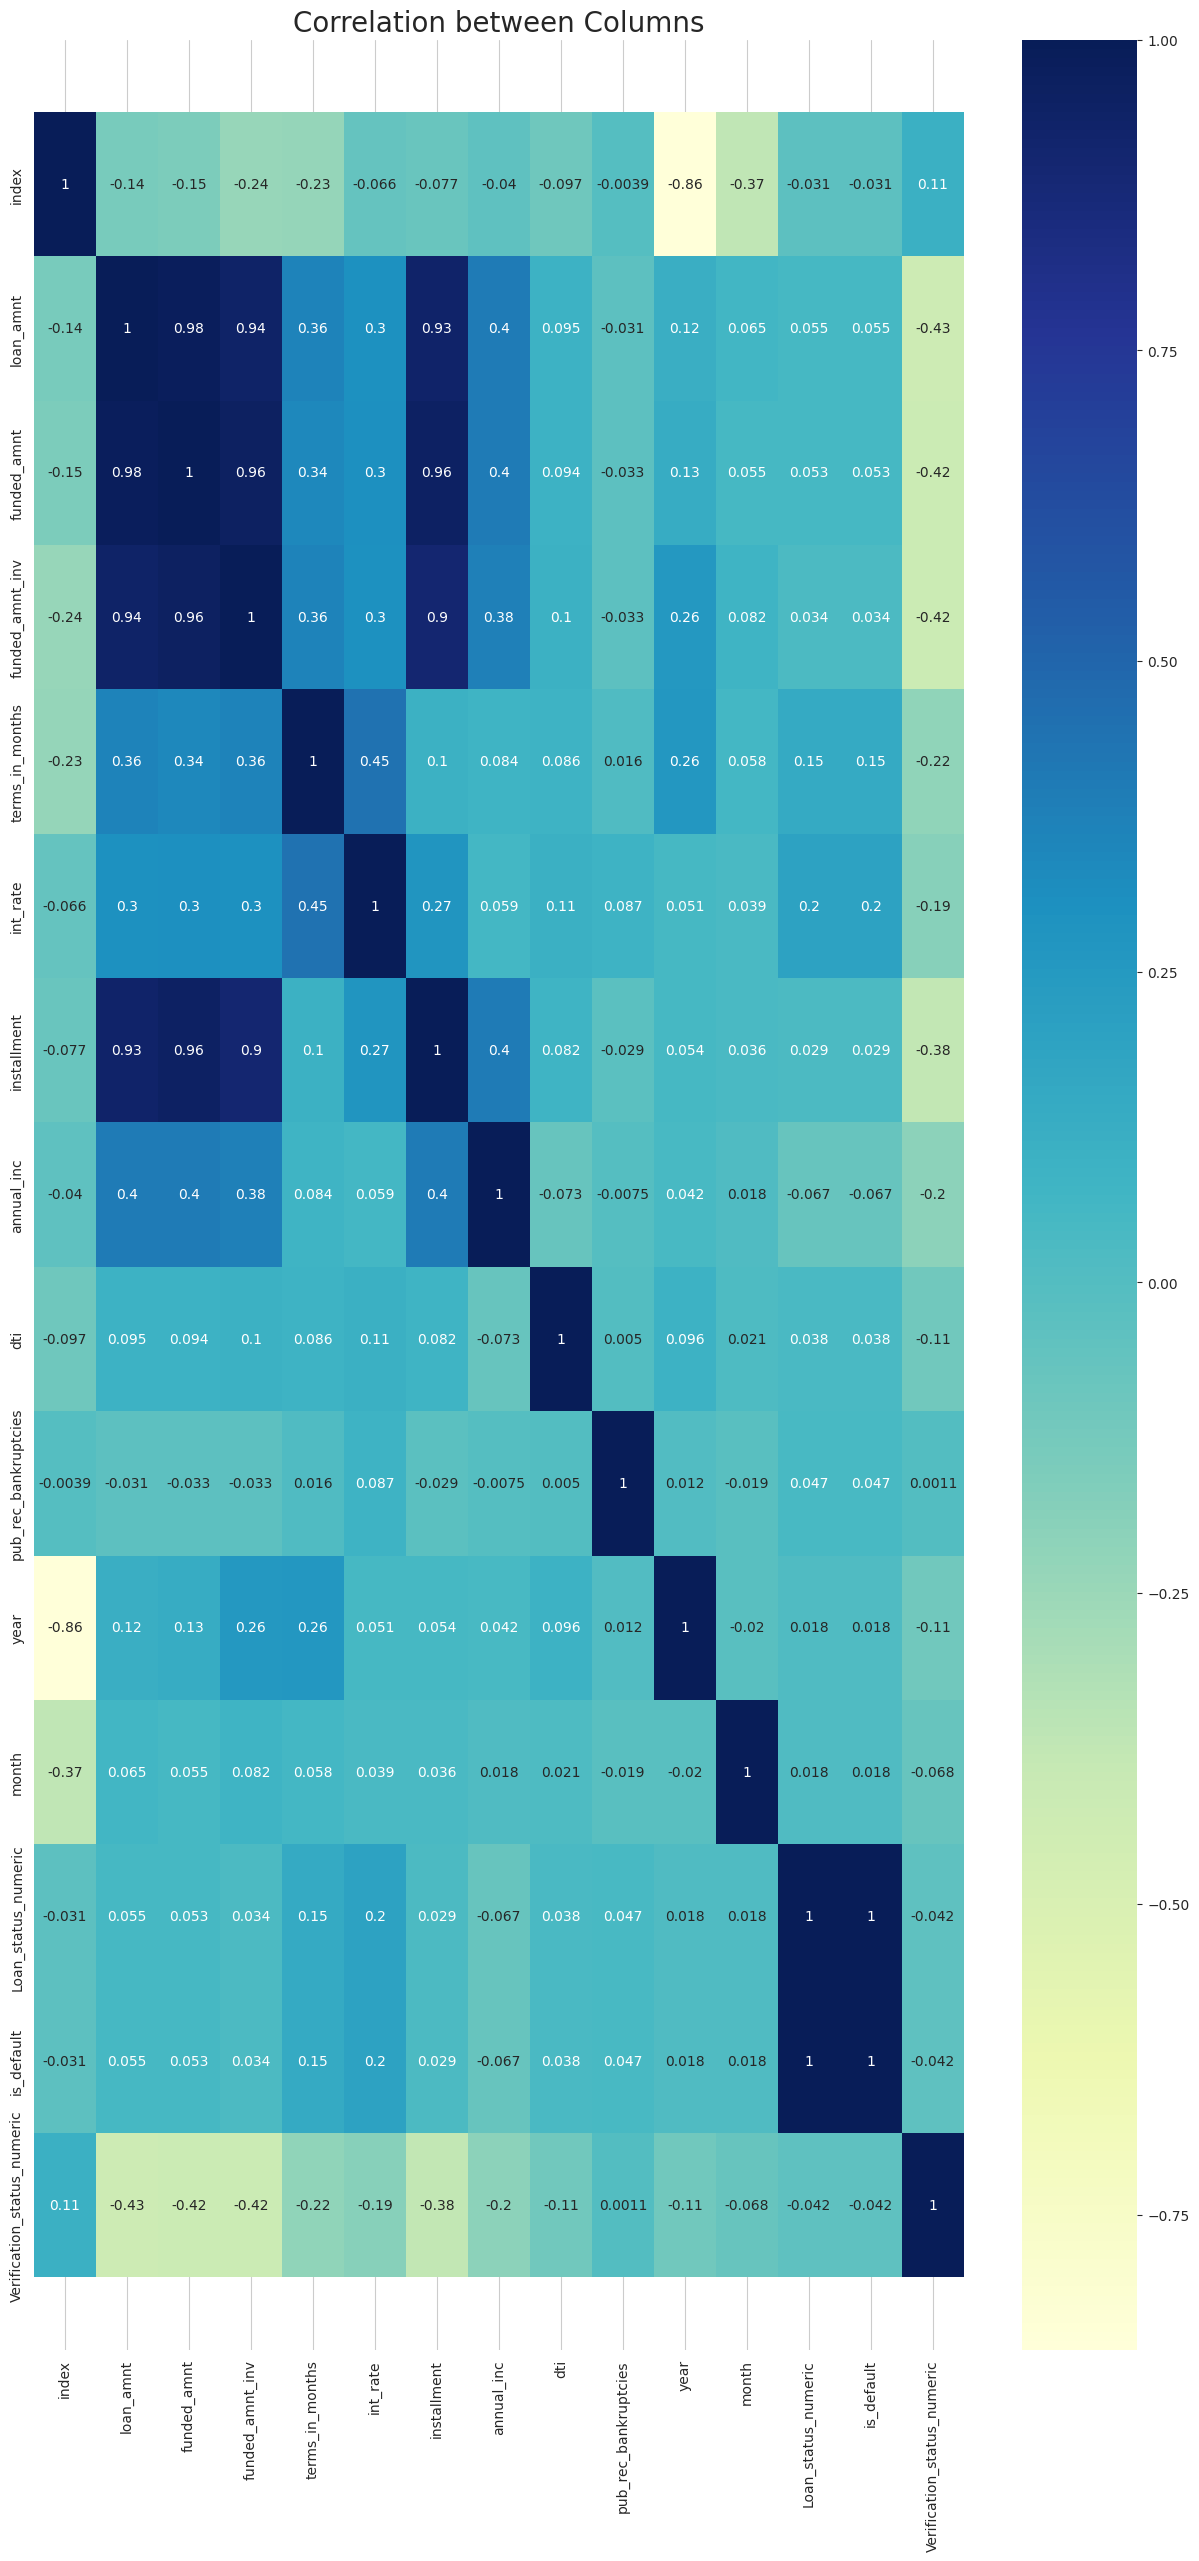

In [77]:
# correlation between the columns of out data set.
loan['Verification_status_numeric'] = loan['verification_status'].map({'Verified': 0, 'Source Verified': 1, 'Not Verified': 1})

plt.figure(figsize=(15,30))
#plotting correlation matric on a heat map
ax = sns.heatmap(loan.corr(numeric_only=True),annot = True, cmap='YlGnBu')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns",fontsize=20)
plt.show()

 ### Observation 
- There is a correlation between loan amount and installment 
- There is some corelation between Interate Rate and Loan Status 

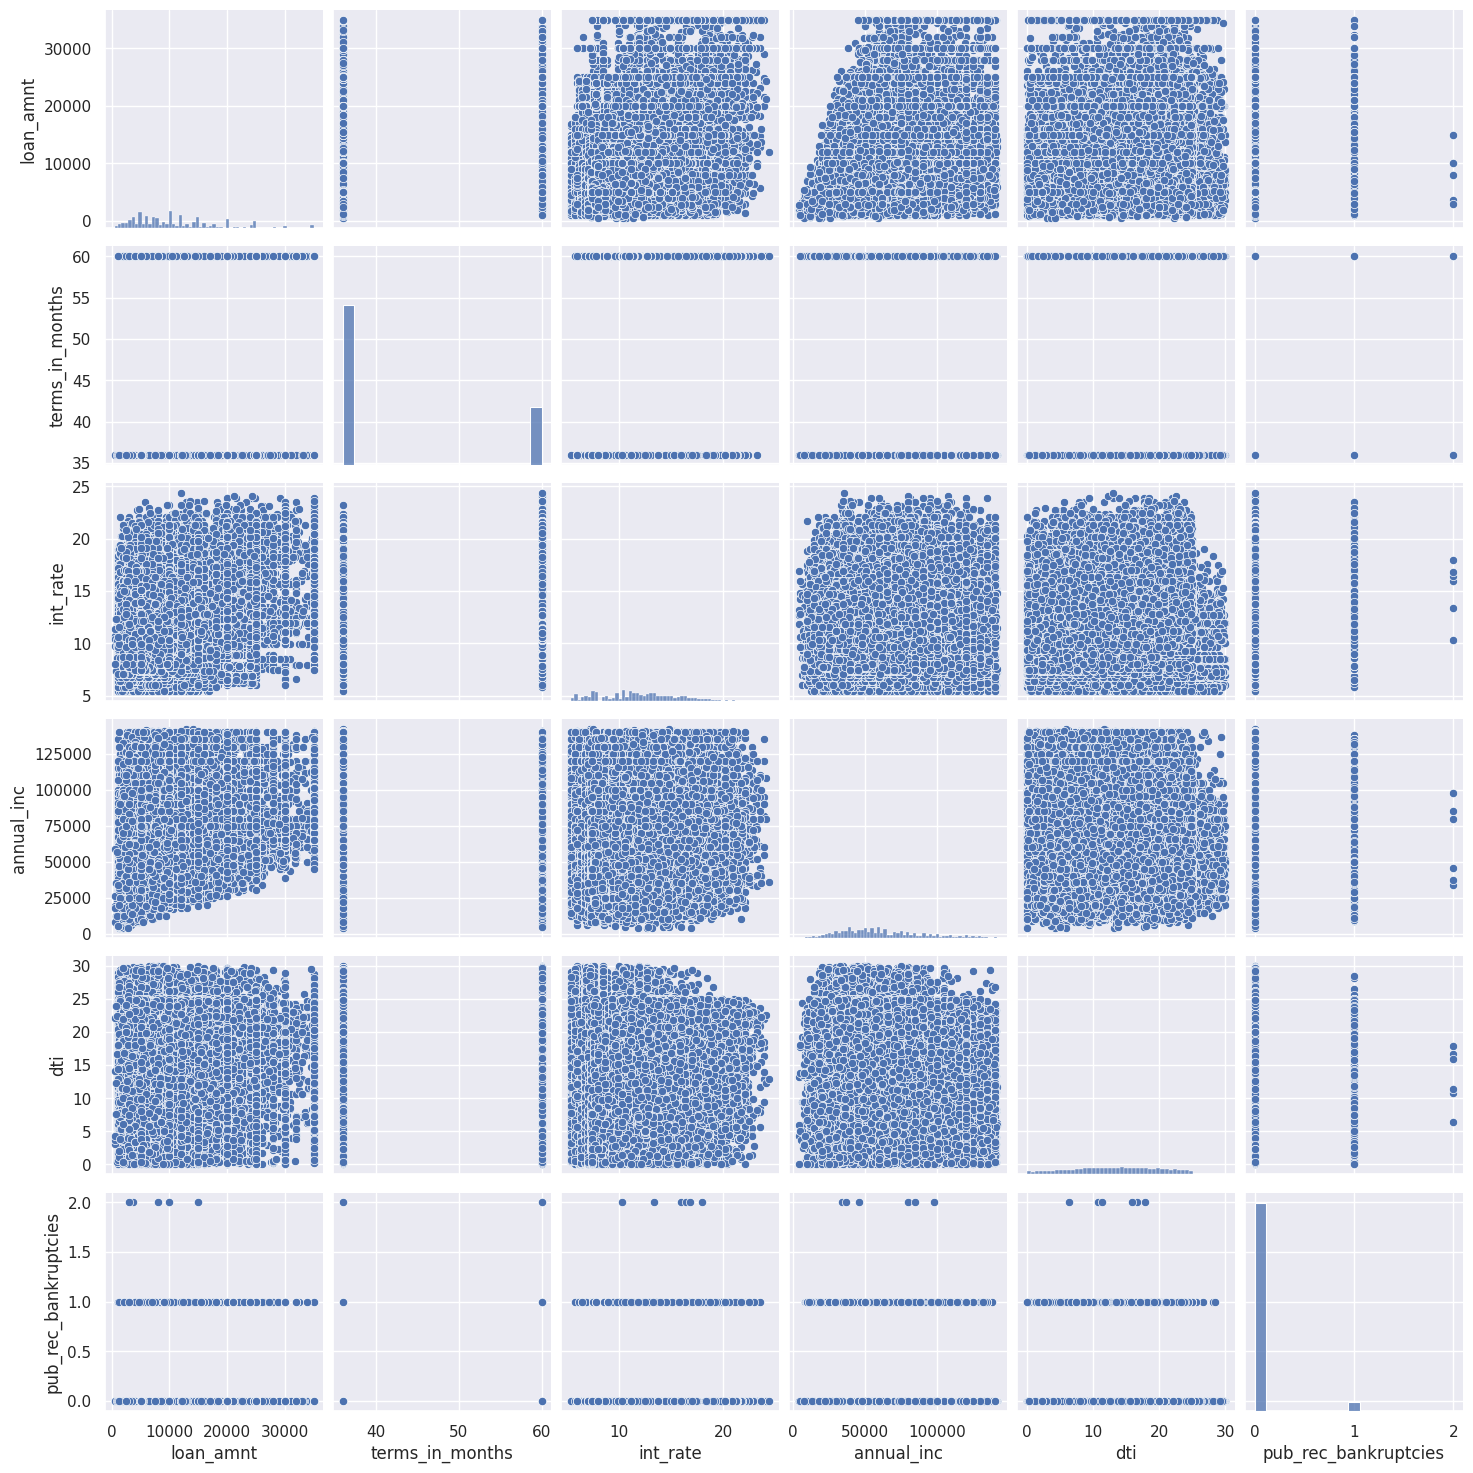

In [78]:
sns.set()
cols = [ 'loan_amnt','terms_in_months',
       'int_rate','grade','home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose','dti', 'pub_rec_bankruptcies']
sns.pairplot(loan[cols], size = 2.5)
plt.show();

## multivariate analysis on loan amount, interest rate, loan status

In [83]:
# Categorizing loans
loan['loan_outcome'] = loan['loan_status'].apply(lambda x: 'Good' if x in ['Fully Paid', 'Current'] else 'Bad')

g = sns.PairGrid(loan, vars=['loan_amnt', 'int_rate', 'annual_inc', 'dti'], hue='loan_outcome')
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot, kde=True)
g.map_lower(sns.kdeplot)
g.add_legend(title='Loan Outcome')
plt.suptitle('PairGrid of Loan Variables with Loan Outcome', y=1.02, fontsize=16)
plt.show()

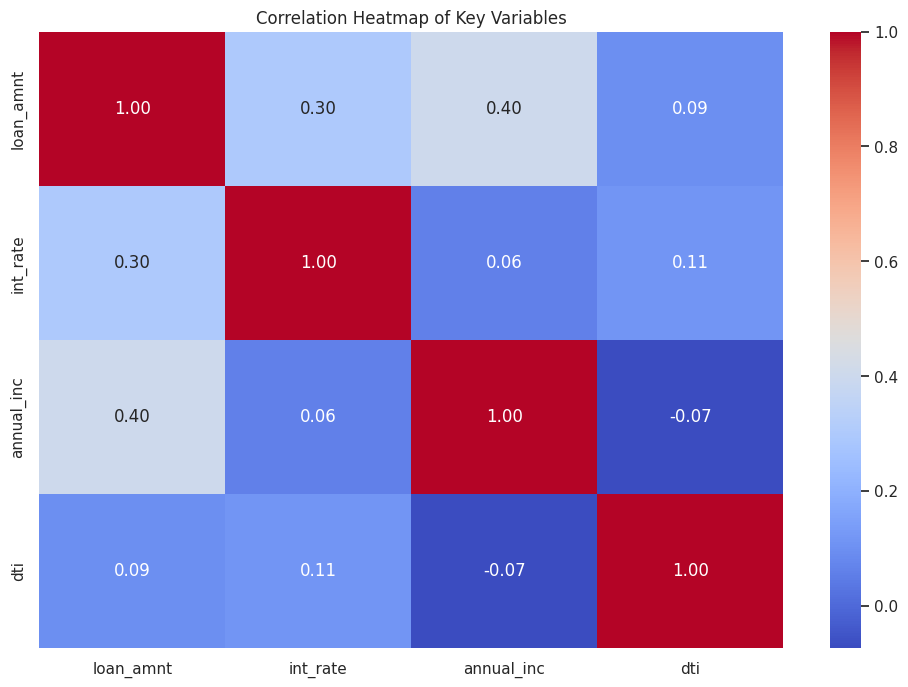

In [80]:
# Select relevant numerical columns for correlation analysis
corr_matrix = loan[['loan_amnt', 'int_rate', 'annual_inc', 'dti']].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Key Variables')
plt.show()

## Observations
1. There is moderate corelation between loan amount and annual income. We can infer that, higher income indivuals might have greater capacity to repay loans
2. Loan amount and devt to income ration is weakly corelated.
3. Loan amount and Interest rate is also weakly corelated.
4. There is not significant relation between DTI, annual income, interest rate